Background: Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not.
Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular
behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the
readings were discarded if they seemed unreliable (out of range). Your job is to develop a pre-processing pipeline
and a classifier, and also find out which subset of proteins is important in predicting which class.

In [ ]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##1.Read the data 

In [ ]:
df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv') # reading the csv file using read_csv() function of pandas library
df # checking the dataframe

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


In [ ]:
# checking the number of rows and columns present in our dataframe
df.shape

(762, 79)

> Clearly our dataframe contains 762 rows and 79 columns. So there are 762 entries with 77 features and 2 target columns.

## 2.Exploratory data analysis 

In [ ]:
# let us see the attributes of each column
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,582.000000,567.000000,762.000000,702.000000,762.000000,612.000000,582.000000,582.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,0.226365,0.156693,0.136973,0.122095,0.129689,0.450260,0.166017,0.182322,0.206105,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.030299,0.029633,0.014928,0.022832,0.062304,0.059256,0.041938,0.058118,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,0.205750,0.136188,0.116234,0.110655,0.111676,0.407385,0.124382,0.152365,0.164155,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.150386,0.131542,0.122600,0.126138,0.450500,0.153342,0.174184,0.191754,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.170685,0.150942,0.133617,0.142831,0.488438,0.195401,0.205146,0.235925,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


In [ ]:
total_entries = 762
df.info() # Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

- We can see that 77 features are numerical columns and `'Genotype'` and `'Treatment_Behaviour'` are categorical columns.
- Also few columns have null entries.

In [ ]:
print("column name with number of non-unique data")
for col in df:
    print(col,total_entries-df[col].nunique(),sep=" | ")  # printing no: of non-unique data

column name with number of non-unique data
DYRK1A_N | 0
ITSN1_N | 1
BDNF_N | 0
NR1_N | 0
NR2A_N | 0
pAKT_N | 0
pBRAF_N | 2
pCAMKII_N | 0
pCREB_N | 0
pELK_N | 0
pERK_N | 0
pJNK_N | 1
PKCA_N | 0
pMEK_N | 0
pNR1_N | 0
pNR2A_N | 0
pNR2B_N | 0
pPKCAB_N | 0
pRSK_N | 0
AKT_N | 0
BRAF_N | 0
CAMKII_N | 0
CREB_N | 4
ELK_N | 15
ERK_N | 0
GSK3B_N | 0
JNK_N | 0
MEK_N | 4
TRKA_N | 0
RSK_N | 1
APP_N | 0
Bcatenin_N | 15
SOD1_N | 0
MTOR_N | 0
P38_N | 1
pMTOR_N | 0
DSCR1_N | 0
AMPKA_N | 0
NR2B_N | 0
pNUMB_N | 0
RAPTOR_N | 0
TIAM1_N | 2
pP70S6_N | 1
NUMB_N | 0
P70S6_N | 0
pGSK3B_N | 0
pPKCG_N | 0
CDK5_N | 0
S6_N | 0
ADARB1_N | 0
AcetylH3K9_N | 0
RRP1_N | 0
BAX_N | 0
ARC_N | 0
ERBB4_N | 0
nNOS_N | 0
Tau_N | 0
GFAP_N | 0
GluR3_N | 0
GluR4_N | 0
IL1B_N | 0
P3525_N | 0
pCASP9_N | 0
PSD95_N | 0
SNCA_N | 1
Ubiquitin_N | 0
pGSK3B_Tyr216_N | 0
SHH_N | 0
BAD_N | 181
BCL2_N | 195
pS6_N | 0
pCFOS_N | 60
SYP_N | 0
H3AcK18_N | 150
EGR1_N | 180
H3MeK4_N | 180
CaNA_N | 0
Genotype | 760
Treatment_Behavior | 758


##2.a. Which variables are usable, and which are not?

In [ ]:
print("column name and with percentage of missing values")
for col in df:
    if(df[col].isna().sum()):
      print(col, round((df[col].isna().sum()/total_entries)*100,2))

column name and with percentage of missing values
ELK_N 1.97
MEK_N 0.52
Bcatenin_N 1.97
BAD_N 23.62
BCL2_N 25.59
pCFOS_N 7.87
H3AcK18_N 19.69
EGR1_N 23.62
H3MeK4_N 23.62


Since there are no null values in the columns and all of them have different values, so we can't ignore any column. 

##3.Dealing with missing variables

In [ ]:
# importing the required libraries
from sklearn.svm import SVR
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from numpy import nan
from sklearn.impute import SimpleImputer

In [ ]:
#Multivariate Imputation
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data1= df.select_dtypes(include=numerics)
lr=SVR()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=10,tol=1e-10,imputation_order='roman')
data1=pd.DataFrame(imp.fit_transform(data1))
i=0;
for col in df.columns:
 if i<76:
  df[col]=data1[i];
 i=i+1;

[IterativeImputer] Completing matrix with shape (762, 77)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.63
[IterativeImputer] Change: 0.5378535408380136, scaled tolerance: 8.482553422000001e-10 
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.25
[IterativeImputer] Change: 0.011267078503769873, scaled tolerance: 8.482553422000001e-10 
[IterativeImputer] Ending imputation round 3/10, elapsed time 1.89
[IterativeImputer] Change: 0.00020535309181601846, scaled tolerance: 8.482553422000001e-10 
[IterativeImputer] Ending imputation round 4/10, elapsed time 2.86
[IterativeImputer] Change: 0.0005779640378555939, scaled tolerance: 8.482553422000001e-10 
[IterativeImputer] Ending imputation round 5/10, elapsed time 4.06
[IterativeImputer] Change: 0.000680172939063084, scaled tolerance: 8.482553422000001e-10 
[IterativeImputer] Ending imputation round 6/10, elapsed time 5.24
[IterativeImputer] Change: 0.0005514533919424025, scaled tolerance: 8.482553422000001e-10

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
#checking the df after imputation
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.171081,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.171081,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.171081,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.171081,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.171081,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


In [ ]:
df.info() # Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

In [ ]:
df.isna().sum() # checking null values

DYRK1A_N              0
ITSN1_N               0
BDNF_N                0
NR1_N                 0
NR2A_N                0
                     ..
EGR1_N                0
H3MeK4_N              0
CaNA_N                0
Genotype              0
Treatment_Behavior    0
Length: 79, dtype: int64

Clearly there are no null entries.

##2.b. Are there significant correlations among variables?

In [ ]:
df.corr() # gives correlation matrix containing correlation with each feature

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.085401,-0.158167,0.082463,0.811398,...,-0.223812,-0.274451,-0.150827,-0.358480,-0.189619,-0.035929,-0.285140,-0.348231,-0.354247,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.068712,-0.114789,0.200468,0.796880,...,-0.220720,-0.359753,-0.248375,-0.299066,-0.268652,0.039384,-0.304661,-0.439939,-0.422038,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,-0.112984,-0.234178,-0.170708,0.070504,-0.238607,0.454025,-0.283454,-0.263038,-0.347578,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,-0.100915,-0.379523,-0.294662,0.227674,-0.340198,0.486483,-0.333442,-0.320086,-0.403291,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,-0.237932,-0.389699,-0.277795,0.215495,-0.372459,0.377628,-0.341537,-0.335615,-0.458078,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,-0.035929,0.039384,0.454025,0.486483,0.377628,0.199349,0.232262,0.187727,0.383455,0.003932,...,0.115625,0.037929,-0.049193,0.392329,-0.015159,1.000000,0.043716,0.050774,0.033958,0.273142
H3AcK18_N,-0.285140,-0.304661,-0.283454,-0.333442,-0.341537,0.259200,0.219343,0.154655,0.104903,-0.224303,...,0.138190,0.405865,0.275134,0.305127,0.244095,0.043716,1.000000,0.442801,0.764839,-0.332944
EGR1_N,-0.348231,-0.439939,-0.263038,-0.320086,-0.335615,0.285669,0.315012,0.091334,-0.086770,-0.201135,...,0.350988,0.768929,0.654900,0.306414,0.596761,0.050774,0.442801,1.000000,0.711373,-0.478796
H3MeK4_N,-0.354247,-0.422038,-0.347578,-0.403291,-0.458078,0.375161,0.380046,0.057533,0.037847,-0.242220,...,0.263041,0.654661,0.532910,0.330030,0.468389,0.033958,0.764839,0.711373,1.000000,-0.421865


***We consider significant correlation when the correlation value is greater than 90%.***

In [ ]:
column1=[]
column2=[]
correlationValues=[]
for col in df.columns:
  for colo in df.columns:
    if (((col == colo) or (col == 'Genotype') or (colo =='Genotype') or (col == 'Treatment_Behavior') or (colo == 'Treatment_Behavior'))!=1): 
      #(abs(df[col].corr(df[colo]))>0.9)):
      df[col]=pd.to_numeric(df[col], downcast="float");
      df[colo]=pd.to_numeric(df[colo], downcast="float");
      if (abs(df[col].corr(df[colo]))>=0.9):
         #print(col,colo,round(df[col].corr(df[colo]),2))
         column1.append(col);
         column2.append(colo);
         correlationValues.append(round(df[col].corr(df[colo]),2));

In [ ]:
#print(df_correlation)
df_correlation= pd.DataFrame({'column1': column1, 'column2': column2, 'correlation values ': correlationValues})
df_correlation

,column1,column2,correlation values
0,DYRK1A_N,ITSN1_N,0.96
1,DYRK1A_N,pERK_N,0.95
2,DYRK1A_N,BRAF_N,0.97
3,ITSN1_N,DYRK1A_N,0.96
4,ITSN1_N,pERK_N,0.91
5,ITSN1_N,BRAF_N,0.93
6,NR1_N,pNR1_N,0.95
7,NR1_N,Bcatenin_N,0.93
8,pERK_N,DYRK1A_N,0.95
9,pERK_N,ITSN1_N,0.91


In [ ]:
df_correlation.sort_values('correlation values ',ascending=False)

,column1,column2,correlation values
19,pS6_N,ARC_N,1.00
18,ARC_N,pS6_N,1.00
14,BRAF_N,DYRK1A_N,0.97
2,DYRK1A_N,BRAF_N,0.97
0,DYRK1A_N,ITSN1_N,0.96
3,ITSN1_N,DYRK1A_N,0.96
6,NR1_N,pNR1_N,0.95
8,pERK_N,DYRK1A_N,0.95
1,DYRK1A_N,pERK_N,0.95
11,pNR1_N,NR1_N,0.95


Observations:
The features having correlation $>95\%$ are eliminated i.e one of them will be used and the other feature will be removed.

The features
- `pS6_N` and `ARC_N`,
-`BRAF_N` and	`DYRK1A_N`
-`DYRK1A_N` and	`ITSN1_N`
- `NR1_N` and	`pNR1_N`
- `DYRK1A_N` and	`pERK_N`.	

Since, `DYRK1A_N` is strongly correlated with many features, we will remove it.

Since `pS6_N` and `ARC_N` have a correlation of 1, we will remove `pS6_N` and also remove `NR1_N`, since it has $95\%$ correlation with `pNR1_N`.

So the features removed are `DYRK1A_N`,`pS6_N`, `NR1_N`. 

***As we can see, many variables have correlations that are greater than 70%, indicating that there are significant correlations between variables.***

##2.c.Are the classes balanced?

In [ ]:
df['Genotype'].unique() # check the unique values of 'Genotype' column

array(['Control', 'Ts65Dn'], dtype=object)

In [ ]:
df['Treatment_Behavior'].unique() # check the unique values of 'Treatment_Behavior' column

array(['Memantine_C/S', 'Memantine_S/C', 'Saline_C/S', 'Saline_S/C'],
      dtype=object)

In [ ]:
print("Percentage of unique values in respective class")
print((df['Genotype'].value_counts())*(100/total_entries))
print((df['Treatment_Behavior'].value_counts())*(100/total_entries))

Percentage of unique values in respective class
Control    57.086614
Ts65Dn     42.913386
Name: Genotype, dtype: float64
Memantine_C/S    29.527559
Memantine_S/C    29.527559
Saline_C/S       23.622047
Saline_S/C       17.322835
Name: Treatment_Behavior, dtype: float64


***Because all of the unique values have a significant share in comparison to the others, we concluded that the classes are balanced.***

# 4.Selecting metrics 

Classification is about predicting the class labels given input data. In binary classification, there are only two possible output classes. In multiclass classification, more than two possible classes can be present.

There are many ways for measuring classification performance. Accuracy, confusion matrix, log-loss, and AUC-ROC are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems.

- `Accuracy` simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.
- `Confusion Matrix` is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values.It is extremely useful for measuring the Recall, Precision, Accuracy, and AUC-ROC curves.
- `Precision` explains how many of the correctly predicted cases actually turned out to be positive.
- `Recall` explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive.
- `F1 Score` gives a combined idea about Precision and Recall metrics.It is the harmonic mean of precision and recall. It is maximum when Precision is equal to Recall.

***The classes are evenly distributed i.e., we are dealing with balanced classification. Metrics like accuracy, precision, recall are good ways to evaluate classification models for balanced datasets.***

Since f1 score is combination of precision-recall, we have used **Accuracy** and **F1 score** as evaluation metrics to find the best model.

# 5.ML Frameworks 

##LABEL ENCODING

Since our target columns are categorical, we convert them into numerical using one-hot encoding.

In [ ]:
# label encoding of 'Genotype' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df
df1['Genotype']= le.fit_transform(df1['Genotype'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df1

{'Control': 0, 'Ts65Dn': 1}


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.171081,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.171081,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622058,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.171081,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.171081,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718678,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.171081,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,1,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,1,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,1,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,1,Saline_S/C


`Control`is encoded as 0

`Ts65Dn`is encoded as 1

In [ ]:
# label encoding of 'Treatment_Behavior' column
df1['Treatment_Behavior']= le.fit_transform(df1['Treatment_Behavior'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df1

{'Memantine_C/S': 0, 'Memantine_S/C': 1, 'Saline_C/S': 2, 'Saline_S/C': 3}


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.171081,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.171081,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622058,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.171081,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.171081,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718678,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.171081,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,1,3
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,1,3
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,1,3
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,1,3


`Memantine_C/S`is encoded as 0  

`Memantine_S/C`is encoded as 1

`Saline_C/S`is encoded as 2

`Saline_S/C` is encoded as 3

Clearly the target columns are now numerical.

## PREPARING TRAIN, VALIDATION DATASETS

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_val=train_test_split(df1,train_size=2/3,random_state=42) #splitting the data into train,val datasets

In [ ]:
print('training data size',"  ",df_train.shape)
print('validation data size',"  ",df_val.shape)

training data size    (508, 79)
validation data size    (254, 79)


In [ ]:
input_columns = list(df_train.columns)[0:-2] # all columns except the last 2 are features
target_column_bin = 'Genotype' # target column for binary classification
target_column_mul = 'Treatment_Behavior'  # target column for multi classification

In [ ]:
training_inputs = df_train[input_columns].copy()           # training features
training_targets_bin = df_train[target_column_bin].copy()  # training targets for binary
training_targets_mul = df_train[target_column_mul].copy()  # training targets for multi
validation_inputs = df_val[input_columns].copy()           # val features
validation_targets_bin = df_val[target_column_bin].copy()  # val targets for binary
validation_targets_mul = df_val[target_column_mul].copy()  # val targets for multi

In [ ]:
training_inputs # check the training features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
626,0.349507,0.561789,0.292899,2.278494,3.554208,0.289361,0.211271,4.603993,0.233763,1.452110,...,0.209392,0.153115,0.146355,0.135392,0.114380,0.426274,0.238889,0.173214,0.259354,1.192582
239,0.342437,0.484999,0.308090,2.059797,3.279330,0.243534,0.191806,2.344507,0.187875,1.259466,...,0.217329,0.213197,0.160040,0.102180,0.148924,0.479692,0.223600,0.233718,0.273764,1.763147
689,0.392590,0.521628,0.289834,1.792298,2.359737,0.218288,0.169009,3.292937,0.199306,1.170834,...,0.258964,0.202206,0.152707,0.104514,0.142401,0.438961,0.211206,0.197126,0.242415,1.641603
176,0.258343,0.425384,0.258155,1.888639,2.989876,0.202662,0.176041,4.794338,0.171354,1.134233,...,0.206597,0.201763,0.199062,0.128395,0.172757,0.477321,0.200626,0.256505,0.249538,1.109910
521,0.417036,0.584891,0.365003,2.308152,4.015610,0.243592,0.194450,3.616304,0.203893,1.151282,...,0.239303,0.174114,0.128956,0.099680,0.135238,0.442456,0.142705,0.171388,0.182055,1.906483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.429133,0.563175,0.258429,2.028151,3.542553,0.214075,0.176759,3.165139,0.167430,1.217676,...,0.243078,0.167912,0.120960,0.131593,0.143068,0.371618,0.118223,0.171071,0.173702,1.405727
106,0.778713,1.063761,0.447825,2.841390,4.975746,0.223787,0.199283,3.979330,0.273796,1.797550,...,0.242362,0.122478,0.102695,0.128413,0.100805,0.472282,0.120807,0.136985,0.136106,1.449598
270,0.778334,1.079118,0.497160,3.757641,8.482553,0.234514,0.205572,2.877333,0.263727,2.805924,...,0.193233,0.130452,0.149566,0.114083,0.137589,0.484529,0.107645,0.152061,0.157750,1.363659
435,0.838053,1.006324,0.364953,2.603061,4.207680,0.202548,0.164055,2.222619,0.230776,2.099349,...,0.207857,0.105862,0.171081,0.111634,0.148164,0.400078,0.112587,0.107095,0.123739,1.829242


In [ ]:
training_targets_bin # check the training targets for binary classification

626    1
239    0
689    1
176    0
521    1
      ..
71     0
106    0
270    0
435    1
102    0
Name: Genotype, Length: 508, dtype: int64

In [ ]:
training_targets_bin.value_counts() # checking the number of entries of each class

0    284
1    224
Name: Genotype, dtype: int64

In [ ]:
training_targets_mul # check the training targets for multi classification

626    1
239    2
689    2
176    1
521    0
      ..
71     0
106    0
270    2
435    0
102    0
Name: Treatment_Behavior, Length: 508, dtype: int64

In [ ]:
training_targets_mul.value_counts() # checking the number of entries of each class

1    152
0    150
2    121
3     85
Name: Treatment_Behavior, dtype: int64

## SCALING NUMERIC FEATURES

***Scaling numeric features to a restricted range of values, such as (0, 1) or (-1,1), guarantees that no one feature has an outsized impact on the model's loss. In fact, optimization techniques work better with lower numbers. The ranges of the numeric columns in our dataset differ.***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1[input_columns])

MinMaxScaler()

In [ ]:
df1[input_columns].describe() # let us see the attributes of each column

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311903,3.882665,0.232722,0.182514,3.513053,0.212083,1.447201,...,0.226365,0.163417,0.145701,0.122095,0.131144,0.450260,0.178382,0.191562,0.214603,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.029108,0.029579,0.014928,0.022472,0.062304,0.062343,0.040676,0.054714,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213117,...,0.205750,0.141100,0.120786,0.110655,0.113270,0.407385,0.130197,0.159005,0.172780,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.160065,0.142974,0.122600,0.128403,0.450500,0.169102,0.191029,0.208713,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471657,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.185160,0.171081,0.133617,0.148164,0.488438,0.212856,0.220082,0.248300,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113348,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


In [ ]:
training_inputs[input_columns] = scaler.transform(training_inputs[input_columns]) # scaling the features of train, val datasets
validation_inputs[input_columns] = scaler.transform(validation_inputs[input_columns])

In [ ]:
training_inputs

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
626,0.076255,0.127301,0.325871,0.368622,0.263088,0.608864,0.581878,0.579858,0.625279,0.179983,...,0.238949,0.334573,0.363276,0.744726,0.230781,0.334653,0.397923,0.265238,0.504835,0.392729
239,0.073241,0.094465,0.376008,0.275270,0.221987,0.485471,0.504949,0.174743,0.388053,0.146092,...,0.279521,0.644731,0.438947,0.381733,0.506059,0.441283,0.359707,0.502365,0.551003,0.762430
689,0.094621,0.110128,0.315757,0.161087,0.084485,0.417493,0.414849,0.344792,0.447150,0.130500,...,0.492324,0.587996,0.398401,0.407244,0.454077,0.359977,0.328729,0.358953,0.450565,0.683675
176,0.037391,0.068973,0.211207,0.202211,0.178707,0.375419,0.442639,0.613986,0.302643,0.124061,...,0.224668,0.585708,0.654716,0.668249,0.695979,0.436550,0.302282,0.591671,0.473385,0.339161
521,0.105043,0.137180,0.563839,0.381281,0.332080,0.485628,0.515397,0.402770,0.470860,0.127060,...,0.391834,0.442975,0.267068,0.354404,0.396994,0.366954,0.157506,0.258081,0.257175,0.855306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.110199,0.127894,0.212110,0.261762,0.261346,0.406150,0.445481,0.321878,0.282361,0.138740,...,0.411130,0.410960,0.222856,0.703203,0.459390,0.225550,0.096313,0.256838,0.230413,0.530838
106,0.259228,0.341950,0.837178,0.608895,0.475644,0.432301,0.534499,0.467859,0.832236,0.240753,...,0.407468,0.176412,0.121859,0.668444,0.122603,0.426491,0.102772,0.123250,0.109956,0.559264
270,0.259066,0.348517,1.000000,1.000000,1.000000,0.461185,0.559354,0.270276,0.780186,0.418149,...,0.156358,0.217579,0.381031,0.511828,0.415728,0.450939,0.069874,0.182336,0.179303,0.503579
435,0.284525,0.317389,0.563673,0.507164,0.360799,0.375112,0.395269,0.152889,0.609839,0.293847,...,0.231106,0.090636,0.500000,0.485060,0.500000,0.282362,0.082225,0.006105,0.070333,0.805257


In [ ]:
x_train = np.array(training_inputs[input_columns]) # training and val inputs and targets
x_validation = np.array(validation_inputs[input_columns])
y_train_bin = np.array(training_targets_bin)
y_validation_bin = np.array(validation_targets_bin)
y_train_mul = np.array(training_targets_mul)
y_validation_mul = np.array(validation_targets_mul)

In [ ]:
x_train

array([[0.07625469, 0.12730134, 0.32587123, ..., 0.26523793, 0.50483453,
        0.39272866],
       [0.07324079, 0.09446504, 0.37600833, ..., 0.50236505, 0.5510031 ,
        0.7624302 ],
       [0.0946211 , 0.11012801, 0.31575656, ..., 0.35895312, 0.45056513,
        0.6836748 ],
       ...,
       [0.259066  , 0.3485167 , 1.        , ..., 0.18233585, 0.17930296,
        0.5035794 ],
       [0.2845248 , 0.31738907, 0.56367344, ..., 0.00610462, 0.07033309,
        0.8052573 ],
       [0.07789763, 0.09731833, 0.468481  , ..., 0.4392919 , 0.6837592 ,
        0.5631182 ]], dtype=float32)

In [ ]:
y_train_bin

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [ ]:
y_train_mul

array([1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 3, 3, 0, 0, 1, 0, 0, 0, 3, 1, 2, 0,
       0, 0, 0, 0, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 2, 3, 3,
       3, 0, 3, 0, 3, 3, 0, 2, 0, 1, 0, 1, 3, 1, 1, 1, 0, 0, 0, 2, 3, 2,
       1, 1, 3, 1, 0, 3, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 3, 3,
       2, 3, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       0, 3, 1, 2, 1, 3, 1, 0, 0, 1, 1, 0, 0, 2, 1, 3, 1, 2, 3, 1, 2, 1,
       1, 1, 3, 1, 0, 1, 3, 3, 3, 2, 3, 2, 1, 0, 1, 3, 0, 2, 0, 1, 1, 2,
       3, 2, 0, 3, 3, 2, 3, 0, 1, 1, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1,
       3, 3, 2, 0, 0, 1, 3, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 2,
       1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 3, 0, 2, 1, 1, 0, 0, 3, 2, 0, 1,
       1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 3, 2, 0, 1, 2, 2, 3,
       0, 3, 0, 2, 1, 1, 1, 2, 1, 1, 1, 3, 0, 0, 0, 3, 1, 3, 1, 1, 1, 0,
       1, 1, 0, 2, 0, 0, 3, 3, 0, 0, 1, 3, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 3, 1, 1, 2, 0, 1, 1, 2, 2, 1,

In [ ]:
x_train.shape, y_train_bin.shape,  y_train_mul.shape

((508, 77), (508,), (508,))

##**Elastic net logistic regression (L1 and L2 weight)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

The hyperparameter is `l1_ratio`. So we have taken a set of l1 ratios and evaluated the model using accuracy as evaluation metric.



###  ***BINARY CLASSIFICATION***

In [ ]:
l1 = np.arange(0,1.0001, 0.05) # different l1 ratios
val_scores_bin=[] # for storing all the accuracies
#r2_scores_bin =[]
f1_scores_bin =[] # for storing all the f1 scores
for i in l1:
  print("L1_ratio:",i)
  model = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=i,max_iter=1000)
  model.fit(x_train, y_train_bin) #fitting
  predictions_train = model.predict(x_train) # predicting
  predictions_val = model.predict(x_validation)
  train_score = accuracy_score(predictions_train, y_train_bin)
  print("score on train data: ", train_score)
  val_score = accuracy_score(predictions_val, y_validation_bin)
  print("score on val data: ", val_score)
  #print("R2 score on val data:",r2_score(predictions_val, y_validation_bin))
  print("f1 score on val data:",f1_score(predictions_val, y_validation_bin,average='binary'))
  print("--------------------------------")
  val_scores_bin.append(val_score)
  #r2_scores_bin.append(r2_score(predictions_val, y_validation_bin))  
  f1_scores_bin.append(f1_score(predictions_val, y_validation_bin,average='binary'))  

L1_ratio: 0.0
score on train data:  0.9389763779527559
score on val data:  0.9409448818897638
f1 score on val data: 0.9253731343283583
--------------------------------
L1_ratio: 0.05
score on train data:  0.9409448818897638
score on val data:  0.9409448818897638
f1 score on val data: 0.9253731343283583
--------------------------------
L1_ratio: 0.1
score on train data:  0.9409448818897638
score on val data:  0.9409448818897638
f1 score on val data: 0.9253731343283583
--------------------------------
L1_ratio: 0.15000000000000002
score on train data:  0.9409448818897638
score on val data:  0.9409448818897638
f1 score on val data: 0.9253731343283583
--------------------------------
L1_ratio: 0.2
score on train data:  0.9409448818897638
score on val data:  0.9409448818897638
f1 score on val data: 0.9253731343283583
--------------------------------
L1_ratio: 0.25
score on train data:  0.9409448818897638
score on val data:  0.9409448818897638
f1 score on val data: 0.9253731343283583
-------

In [ ]:
best_l1_ratio_index_bin = val_scores_bin.index(max(val_scores_bin))
print("Best L1 ratio for binary is {0} with max val accuracy {1} and f1 score {2}".format(l1[best_l1_ratio_index_bin] ,max(val_scores_bin),f1_scores_bin[best_l1_ratio_index_bin] ))

Best L1 ratio for binary is 0.8500000000000001 with max val accuracy 0.9488188976377953 and f1 score 0.9353233830845772


###  ***MULTI CLASSIFICATION***

In [ ]:
l1 = np.arange(0,1.0001, 0.05)
val_scores_mul=[]
#r2_scores_mul =[]
f1_scores_mul =[]
for i in l1:
  print("L1_ratio:",i)
  model = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=i,max_iter=1000)
  model.fit(x_train, y_train_mul)
  predictions_train = model.predict(x_train)
  predictions_val = model.predict(x_validation)
  train_score = accuracy_score(predictions_train, y_train_mul)
  print("score on train data: ", train_score)
  val_score = accuracy_score(predictions_val, y_validation_mul)
  print("score on val data: ", val_score)
  #print("R2 score on val data:",r2_score(predictions_val, y_validation_mul))
  print("f1 score on val data:",f1_score(predictions_val, y_validation_mul,average='weighted'))
  print("--------------------------------")
  val_scores_mul.append(val_score)
  #r2_scores_mul.append(r2_score(predictions_val, y_validation_mul))  
  f1_scores_mul.append(f1_score(predictions_val, y_validation_mul,average='weighted'))

L1_ratio: 0.0
score on train data:  0.9744094488188977
score on val data:  0.9645669291338582
f1 score on val data: 0.9646010244644025
--------------------------------
L1_ratio: 0.05
score on train data:  0.9724409448818898
score on val data:  0.9645669291338582
f1 score on val data: 0.9646010244644025
--------------------------------
L1_ratio: 0.1
score on train data:  0.9724409448818898
score on val data:  0.9606299212598425
f1 score on val data: 0.960671792116142
--------------------------------
L1_ratio: 0.15000000000000002
score on train data:  0.9724409448818898
score on val data:  0.9606299212598425
f1 score on val data: 0.960671792116142
--------------------------------
L1_ratio: 0.2
score on train data:  0.9724409448818898
score on val data:  0.9645669291338582
f1 score on val data: 0.9645747046596134
--------------------------------
L1_ratio: 0.25
score on train data:  0.9724409448818898
score on val data:  0.9645669291338582
f1 score on val data: 0.9645747046596134
---------

In [ ]:
best_l1_ratio_index_mul = val_scores_mul.index(max(val_scores_mul))
print("Best L1 ratio for multi is {0} with max val accuracy {1} and f1 score {2}".format(l1[best_l1_ratio_index_mul] ,max(val_scores_mul),f1_scores_mul[best_l1_ratio_index_mul] ))

Best L1 ratio for multi is 0.6000000000000001 with max val accuracy 0.9724409448818898 and f1 score 0.9724487204076449


### OBSERVATIONS

In [ ]:
# observing and finalizing the best model
print("For Best L1 ratio value {0} achieved in binary classification".format(l1[best_l1_ratio_index_bin]))
print("Binary Classification model:  Val accuracy: {0}  | f1 score: {1}".format(round(val_scores_bin[best_l1_ratio_index_bin],3),round(f1_scores_bin[best_l1_ratio_index_bin],3)))
print("Multi Classification model:   Val accuracy: {0}  | f1 score: {1}".format(round(val_scores_mul[best_l1_ratio_index_bin],3),round(f1_scores_mul[best_l1_ratio_index_bin],3)))
print()
print("For Best L1 ratio value {0} achieved in multiclassification".format(l1[best_l1_ratio_index_mul]))
print("Binary Classification model:  Val accuracy: {0}  | f1 score: {1}".format(round(val_scores_bin[best_l1_ratio_index_mul],3),round(f1_scores_bin[best_l1_ratio_index_mul],3)))
print("Multi Classification model:   Val accuracy: {0}  | f1 score: {1}".format(round(val_scores_mul[best_l1_ratio_index_mul],3),round(f1_scores_mul[best_l1_ratio_index_mul],3)))


For Best L1 ratio value 0.8500000000000001 achieved in binary classification
Binary Classification model:  Val accuracy: 0.949  | f1 score: 0.935
Multi Classification model:   Val accuracy: 0.949  | f1 score: 0.949

For Best L1 ratio value 0.6000000000000001 achieved in multiclassification
Binary Classification model:  Val accuracy: 0.941  | f1 score: 0.925
Multi Classification model:   Val accuracy: 0.972  | f1 score: 0.972


**Clearly L1 ratio of 0.85 is good for both binary and multiclass classification.**

### ***BUILDING MODEL FOR BINARY CLASSIFICATION WITH ACHIEVED OPTIMUM L1 RATIO*** 

The optimum value of L1 ratio achieved is 0.85. So we build the model with this ratio to make predictions on test data.

In [ ]:
model_bin = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio =0.85,max_iter=1000)
model_bin.fit(x_train, y_train_bin)
predictions_train = model_bin.predict(x_train)
predictions_val = model_bin.predict(x_validation)


In [ ]:
train_score = accuracy_score(predictions_train, y_train_bin)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val, y_validation_bin)
print("score on val data: ", val_score)
#print("R2 score on val data:",r2_score(predictions_val, y_validation_bin))
print("f1 score on val data:",f1_score(predictions_val, y_validation_bin,average='binary'))

score on train data:  0.9488188976377953
score on val data:  0.9488188976377953
f1 score on val data: 0.9353233830845772


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions_val, y_validation_bin)
cm

array([[147,   9],
       [  4,  94]])

Text(0.5, 1.0, 'Confusion Matrix')

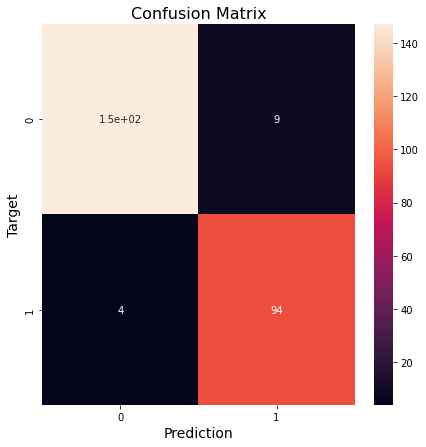

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize="14")
plt.ylabel('Target',fontsize="14")
plt.title('Confusion Matrix',fontsize="16")

In [ ]:
from sklearn.metrics import classification_report
print("Report on Predicted and Actual values of Train data:",end="\n\n")
print(classification_report(predictions_train, y_train_bin))
print("Report on Predicted and Actual values of Validation data:",end="\n\n")
print(classification_report(predictions_val, y_validation_bin))

Report on Predicted and Actual values of Train data:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       292
           1       0.92      0.96      0.94       216

    accuracy                           0.95       508
   macro avg       0.95      0.95      0.95       508
weighted avg       0.95      0.95      0.95       508

Report on Predicted and Actual values of Validation data:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       156
           1       0.91      0.96      0.94        98

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



In [ ]:
training_probs = model_bin.predict_proba(x_train)
training_probs

array([[0.0182609 , 0.9817391 ],
       [0.7424066 , 0.25759336],
       [0.01596487, 0.98403513],
       ...,
       [0.98039246, 0.01960754],
       [0.04625052, 0.9537495 ],
       [0.75816905, 0.24183093]], dtype=float32)

### ***BUILDING MODEL FOR MULTI CLASSIFICATION WITH ACHIEVED OPTIMUM L1 RATIO*** 

In [ ]:
model_mul = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio =0.85,max_iter=1000)
model_mul.fit(x_train, y_train_mul)
predictions_train = model_mul.predict(x_train)
predictions_val = model_mul.predict(x_validation)


In [ ]:
train_score = accuracy_score(predictions_train, y_train_mul)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val, y_validation_mul)
print("score on val data: ", val_score)
#print("R2 score on val data:",r2_score(predictions_val, y_validation_mul))
print("f1 score on val data:",f1_score(predictions_val, y_validation_mul,average='weighted'))

score on train data:  0.9606299212598425
score on val data:  0.9488188976377953
f1 score on val data: 0.9487521892307988


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions_val, y_validation_mul)
cm

array([[68,  0,  5,  0],
       [ 0, 73,  0,  1],
       [ 7,  0, 54,  0],
       [ 0,  0,  0, 46]])

Text(0.5, 1.0, 'Confusion Matrix')

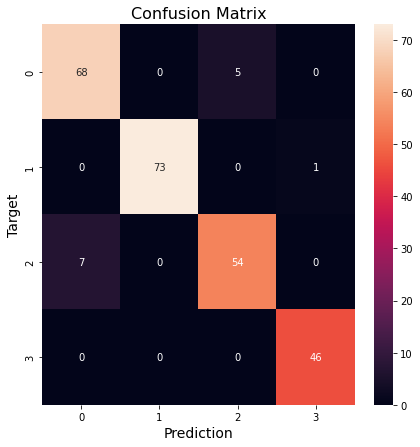

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize="14")
plt.ylabel('Target',fontsize="14")
plt.title('Confusion Matrix',fontsize="16")

In [ ]:
from sklearn.metrics import classification_report
print("Report on Predicted and Actual values of Train data:",end="\n\n")
print(classification_report(predictions_train, y_train_mul))
print("Report on Predicted and Actual values of Validation data:",end="\n\n")
print(classification_report(predictions_val, y_validation_mul))

Report on Predicted and Actual values of Train data:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       145
           1       1.00      0.97      0.98       157
           2       0.96      0.92      0.94       126
           3       0.94      1.00      0.97        80

    accuracy                           0.96       508
   macro avg       0.96      0.96      0.96       508
weighted avg       0.96      0.96      0.96       508

Report on Predicted and Actual values of Validation data:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        73
           1       1.00      0.99      0.99        74
           2       0.92      0.89      0.90        61
           3       0.98      1.00      0.99        46

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



In [ ]:
training_probs = model_mul.predict_proba(x_train)
training_probs

array([[1.9949187e-02, 9.6238142e-01, 1.8419175e-04, 1.7485205e-02],
       [4.3381208e-01, 4.5505178e-04, 5.5342001e-01, 1.2312863e-02],
       [1.2264056e-01, 3.1334874e-03, 8.2807863e-01, 4.6147373e-02],
       ...,
       [2.1421231e-01, 8.9617854e-04, 7.8368485e-01, 1.2066292e-03],
       [9.0556496e-01, 8.6419735e-05, 8.2298510e-02, 1.2049955e-02],
       [9.4999772e-01, 8.1597110e-03, 2.2151988e-02, 1.9690653e-02]],
      dtype=float32)

### ***FEATURE IMPORTANCE*** 

Let's create dataframes having the importance of each feature for both the binary and multi classification models

In [ ]:
# get importance for binary classification model
importance = model_bin.coef_[0]
imp=[]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0s, Score: %.5f' % (input_columns[i],v))
  imp.append(v)
  

Feature: DYRK1A_N, Score: 0.00000
Feature: ITSN1_N, Score: 0.50006
Feature: BDNF_N, Score: -2.05570
Feature: NR1_N, Score: -1.14489
Feature: NR2A_N, Score: 0.00000
Feature: pAKT_N, Score: 0.00000
Feature: pBRAF_N, Score: 0.00000
Feature: pCAMKII_N, Score: -1.01217
Feature: pCREB_N, Score: 0.00000
Feature: pELK_N, Score: 0.00000
Feature: pERK_N, Score: 0.00000
Feature: pJNK_N, Score: 0.00000
Feature: PKCA_N, Score: 0.00000
Feature: pMEK_N, Score: 0.00000
Feature: pNR1_N, Score: -0.76375
Feature: pNR2A_N, Score: 0.00000
Feature: pNR2B_N, Score: 0.00000
Feature: pPKCAB_N, Score: 0.00000
Feature: pRSK_N, Score: 0.00000
Feature: AKT_N, Score: 0.00000
Feature: BRAF_N, Score: 0.00000
Feature: CAMKII_N, Score: 0.00000
Feature: CREB_N, Score: 0.00000
Feature: ELK_N, Score: -1.59716
Feature: ERK_N, Score: -1.97298
Feature: GSK3B_N, Score: 0.00000
Feature: JNK_N, Score: 0.00000
Feature: MEK_N, Score: 0.00000
Feature: TRKA_N, Score: 2.27964
Feature: RSK_N, Score: 0.00000
Feature: APP_N, Score: 11.

In [ ]:
important_features_bin = pd.DataFrame({'Feature': input_columns, 'Importance':imp}).sort_values('Importance', ascending=False)
important_features_bin # for binary classification model

,Feature,Importance
30,APP_N,11.508448
41,TIAM1_N,2.317668
28,TRKA_N,2.279640
62,pCASP9_N,1.901289
46,pPKCG_N,1.888075
...,...,...
2,BDNF_N,-2.055697
33,MTOR_N,-2.294976
72,SYP_N,-2.628408
37,AMPKA_N,-3.081190


In [ ]:
# get importance for multi classification model
importance = model_mul.coef_[0]
imp=[]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0s, Score: %.5f' % (input_columns[i],v))
  imp.append(v)

Feature: DYRK1A_N, Score: 0.00000
Feature: ITSN1_N, Score: 0.00000
Feature: BDNF_N, Score: 0.57474
Feature: NR1_N, Score: 0.00000
Feature: NR2A_N, Score: 0.51059
Feature: pAKT_N, Score: 0.00000
Feature: pBRAF_N, Score: 0.00000
Feature: pCAMKII_N, Score: 0.00000
Feature: pCREB_N, Score: -1.21112
Feature: pELK_N, Score: 0.00000
Feature: pERK_N, Score: 0.00000
Feature: pJNK_N, Score: 0.00000
Feature: PKCA_N, Score: 0.24593
Feature: pMEK_N, Score: 0.00000
Feature: pNR1_N, Score: 0.00000
Feature: pNR2A_N, Score: 0.00000
Feature: pNR2B_N, Score: 0.00000
Feature: pPKCAB_N, Score: 0.00000
Feature: pRSK_N, Score: 0.04936
Feature: AKT_N, Score: 0.00000
Feature: BRAF_N, Score: 0.00000
Feature: CAMKII_N, Score: -0.46348
Feature: CREB_N, Score: 0.00000
Feature: ELK_N, Score: 0.00000
Feature: ERK_N, Score: 0.00000
Feature: GSK3B_N, Score: 0.00000
Feature: JNK_N, Score: 1.15736
Feature: MEK_N, Score: -1.30051
Feature: TRKA_N, Score: 1.26302
Feature: RSK_N, Score: 0.00000
Feature: APP_N, Score: 2.3148

In [ ]:
important_features_mul = pd.DataFrame({'Feature': input_columns, 'Importance': imp}).sort_values('Importance', ascending=False)
important_features_mul # for multi classification model 

,Feature,Importance
76,CaNA_N,3.342650
30,APP_N,2.314864
28,TRKA_N,1.263015
26,JNK_N,1.157358
58,GluR3_N,0.678358
...,...,...
27,MEK_N,-1.300512
46,pPKCG_N,-1.453026
64,SNCA_N,-2.638448
52,BAX_N,-3.440918


Here we have sorted the dataframes based on importance in decreasing order i.e., the most important features will be at the top of the dataframe.

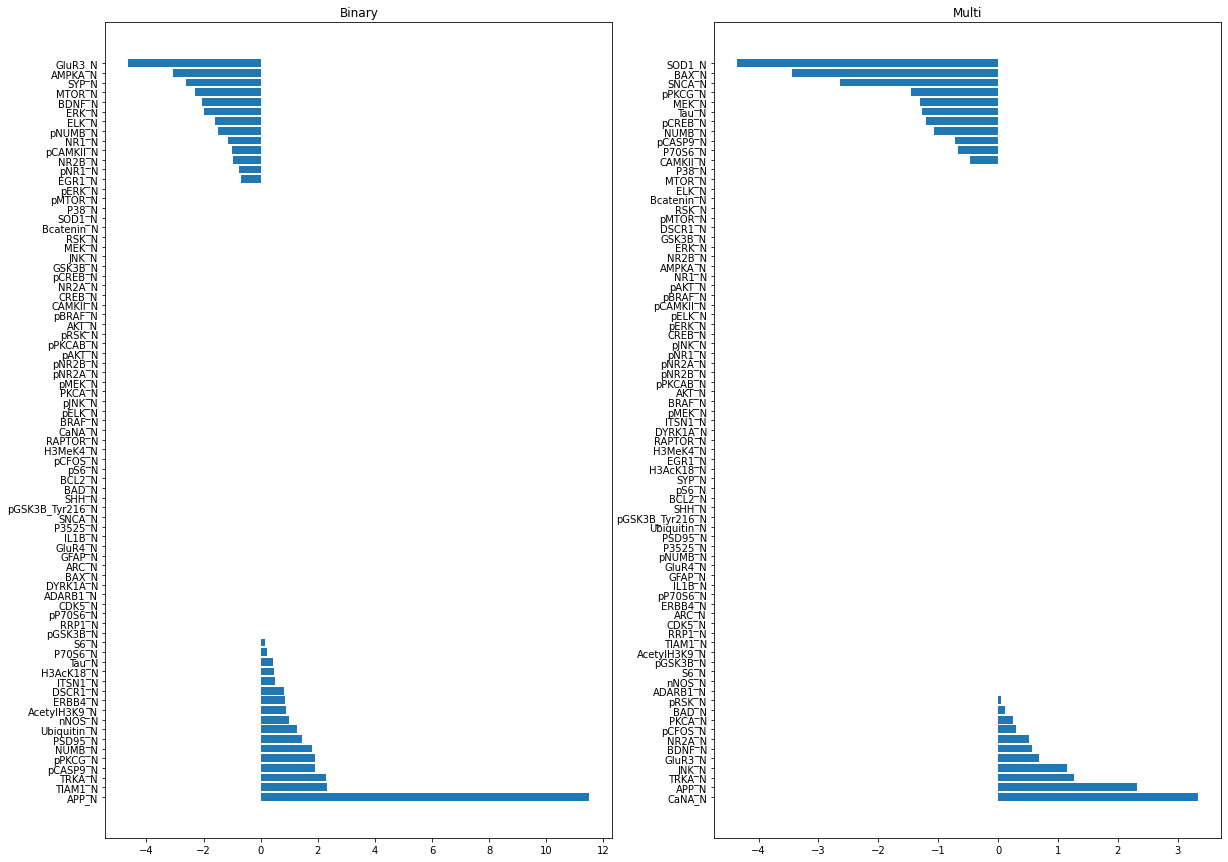

In [ ]:
# Let’s plot the importances (chart will be easier to interpret than values).
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.barh(important_features_bin['Feature'], important_features_bin['Importance']);
plt.title("Binary");
plt.subplot(122)
plt.barh(important_features_mul['Feature'], important_features_mul['Importance']);
plt.title("Multi");

In [ ]:
important_features_bin.head(10) # checking the top 10 important features for binary classification model 

,Feature,Importance
30,APP_N,11.508448
41,TIAM1_N,2.317668
28,TRKA_N,2.279640
62,pCASP9_N,1.901289
46,pPKCG_N,1.888075
43,NUMB_N,1.784710
63,PSD95_N,1.451871
65,Ubiquitin_N,1.266887
55,nNOS_N,0.974466
50,AcetylH3K9_N,0.899471


In [ ]:
important_features_mul.head(10) # checking the top 10 important features for multi classification model 

,Feature,Importance
76,CaNA_N,3.342650
30,APP_N,2.314864
28,TRKA_N,1.263015
26,JNK_N,1.157358
58,GluR3_N,0.678358
2,BDNF_N,0.574735
4,NR2A_N,0.510594
71,pCFOS_N,0.303139
12,PKCA_N,0.245933
68,BAD_N,0.108274


Let's visualize these top 10 important features for both the models.

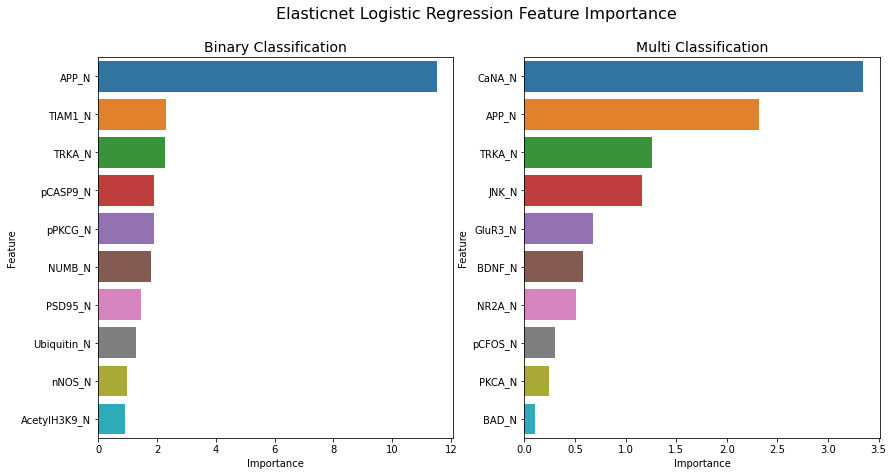

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Binary Classification',fontsize="14")
sns.barplot(data=important_features_bin.head(10), x='Importance', y='Feature');
plt.subplot(122)
plt.title('Multi Classification',fontsize="14")
sns.barplot(data=important_features_mul.head(10), x='Importance', y='Feature');
plt.suptitle('Elasticnet Logistic Regression Feature Importance',fontsize="16");

In [ ]:
def common_member(a, b): # function defined for seeing the common features in the list of top 20 important features of binary and multi
    a_set = set(a)
    b_set = set(b)
 
    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print("No common elements")


In [ ]:
# printing the most common features from top 20 important features from both the models
common_member(list(important_features_bin['Feature'].values[:20]), list(important_features_mul['Feature'].values[:20]))

{'TIAM1_N', 'pGSK3B_N', 'S6_N', 'nNOS_N', 'APP_N', 'AcetylH3K9_N', 'RRP1_N', 'TRKA_N'}


The top important features obtained using Elasticnet model for both binary and multi classifications are:<br>**'pP70S6_N', 'S6_N', 'nNOS_N', 'APP_N', 'TRKA_N', 'AcetylH3K9_N'**

##**Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight decay)**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

###  ***BINARY CLASSIFICATION***

The hyperparameter is the number of neurons in the hidden layer. Since we are using a single hidden layer, different number of neurons are considered and evaluated the model using accuracy as evaluation metric.


In [ ]:
val_scores_bin=[]
#r2_scores_bin =[]
f1_scores_bin =[]
sizes = np.arange(10,201,10) #checking for different no: of neurons
for s in sizes:
  print("No: of neurons",s)
  clf = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-5,max_iter=1000,
                      hidden_layer_sizes=(s,), random_state=50) # one hidden layer with s  neurons
  clf.fit(x_train, y_train_bin)
  predictions_train = clf.predict(x_train)
  predictions_val = clf.predict(x_validation)
  train_score = accuracy_score(predictions_train, y_train_bin)
  print("score on train data:", train_score)
  val_score = accuracy_score(predictions_val, y_validation_bin)
  print("score on val data:", val_score)
  #print("R2 score on val data:",r2_score(predictions_val, y_validation_bin))
  print("f1 score on val data:",f1_score(predictions_val, y_validation_bin,average='binary'))
  print("--------------------------------")
  val_scores_bin.append(val_score)
  #r2_scores_bin.append(r2_score(predictions_val, y_validation_bin))
  f1_scores_bin.append(f1_score(predictions_val, y_validation_bin,average='binary'))  


No: of neurons 10
score on train data: 1.0
score on val data: 0.9724409448818898
f1 score on val data: 0.9665071770334929
--------------------------------
No: of neurons 20
score on train data: 1.0
score on val data: 0.968503937007874
f1 score on val data: 0.9619047619047619
--------------------------------
No: of neurons 30
score on train data: 1.0
score on val data: 0.9803149606299213
f1 score on val data: 0.9760765550239234
--------------------------------
No: of neurons 40
score on train data: 1.0
score on val data: 0.952755905511811
f1 score on val data: 0.9439252336448598
--------------------------------
No: of neurons 50
score on train data: 1.0
score on val data: 0.968503937007874
f1 score on val data: 0.9619047619047619
--------------------------------
No: of neurons 60
score on train data: 1.0
score on val data: 0.984251968503937
f1 score on val data: 0.9805825242718447
--------------------------------
No: of neurons 70
score on train data: 1.0
score on val data: 0.9645669291

In [ ]:
best_neurons_index_bin = val_scores_bin.index(max(val_scores_bin))
print("No: of neurons are {0} for binary  with max val accuracy {1} and f1 score {2}".format(sizes[best_neurons_index_bin] ,max(val_scores_bin), f1_scores_bin[best_neurons_index_bin] ))

No: of neurons are 60 for binary  with max val accuracy 0.984251968503937 and f1 score 0.9805825242718447


###  ***MULTI CLASSIFICATION***

In [ ]:
val_scores_mul=[]
#r2_scores_mul =[]
f1_scores_mul =[]
sizes = np.arange(10,201,10) #checking for different no: of neurons
for s in sizes:
  print("No: of neurons",s)
  clf = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-5,max_iter=1000,
                      hidden_layer_sizes=(s,), random_state=50) # one hidden layer with s  neurons
  clf.fit(x_train, y_train_mul)
  predictions_train = clf.predict(x_train)
  predictions_val = clf.predict(x_validation)
  train_score = accuracy_score(predictions_train, y_train_mul)
  print("score on train data:", train_score)
  val_score = accuracy_score(predictions_val, y_validation_mul)
  print("score on val data:", val_score)
  #print("R2 score on val data:",r2_score(predictions_val, y_validation_mul))
  print("f1 score on val data:",f1_score(predictions_val, y_validation_mul,average='weighted'))
  print("--------------------------------")
  val_scores_mul.append(val_score)
  #r2_scores_mul.append(r2_score(predictions_val, y_validation_mul))
  f1_scores_mul.append(f1_score(predictions_val, y_validation_mul,average='weighted'))


No: of neurons 10
score on train data: 1.0
score on val data: 0.9803149606299213
f1 score on val data: 0.9803214479495063
--------------------------------
No: of neurons 20
score on train data: 1.0
score on val data: 0.9921259842519685
f1 score on val data: 0.9921375481477841
--------------------------------
No: of neurons 30
score on train data: 1.0
score on val data: 0.9921259842519685
f1 score on val data: 0.9921420609628878
--------------------------------
No: of neurons 40
score on train data: 1.0
score on val data: 0.9881889763779528
f1 score on val data: 0.9882128286146271
--------------------------------
No: of neurons 50
score on train data: 1.0
score on val data: 0.9881889763779528
f1 score on val data: 0.9881967519037079
--------------------------------
No: of neurons 60
score on train data: 1.0
score on val data: 0.9881889763779528
f1 score on val data: 0.9882128286146271
--------------------------------
No: of neurons 70
score on train data: 1.0
score on val data: 0.980314

In [ ]:
best_neurons_index_mul = val_scores_mul.index(max(val_scores_mul))
print("No: of neurons are {0} for multi with max val accuracy {1} and f1 score {2}".format(sizes[best_neurons_index_mul],max(val_scores_mul), f1_scores_mul[best_neurons_index_mul] ))

No: of neurons are 100 for multi with max val accuracy 0.9960629921259843 and f1 score 0.9960667804960448


### OBSERVATIONS

In [ ]:
# observing and finalizing the best model
print("For Best no: of neurons {0} achieved in binary classification".format(sizes[best_neurons_index_bin]))
print("Binary Classification model:  Val accuracy: {0}  | f1 score: {1}".format(round(val_scores_bin[best_neurons_index_bin],3),round(f1_scores_bin[best_neurons_index_bin],3)))
print("Multi Classification model:   Val accuracy: {0}  | f1 score: {1}".format(round(val_scores_mul[best_neurons_index_bin],3),round(f1_scores_mul[best_neurons_index_bin],3)))
print()
print("For Best no: of neurons {0} achieved in multiclassification".format(sizes[best_neurons_index_mul]))
print("Binary Classification model:  Val accuracy: {0}  | f1 score: {1}".format(round(val_scores_bin[best_neurons_index_mul],3),round(f1_scores_bin[best_neurons_index_mul],3)))
print("Multi Classification model:   Val accuracy: {0}  | f1 score: {1}".format(round(val_scores_mul[best_neurons_index_mul],3),round(f1_scores_mul[best_neurons_index_mul],3)))

For Best no: of neurons 60 achieved in binary classification
Binary Classification model:  Val accuracy: 0.984  | f1 score: 0.981
Multi Classification model:   Val accuracy: 0.988  | f1 score: 0.988

For Best no: of neurons 100 achieved in multiclassification
Binary Classification model:  Val accuracy: 0.961  | f1 score: 0.953
Multi Classification model:   Val accuracy: 0.996  | f1 score: 0.996


**Clearly 60 neurons in the hidden layer is good for both binary and multiclass classification.**

### ***BUILDING MODEL FOR BINARY CLASSIFICATION WITH ACHIEVED OPTIMUM NO: OF NEURONS*** 

The optimum value of no: of neurons in the hidden layer achieved is 60. So we build the model with this number to make predictions on test data.

In [ ]:
clf_bin = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-5,max_iter=1000,
                      hidden_layer_sizes=(60,), random_state=50) # one hidden layer with 50  neurons                   
clf_bin.fit(x_train, y_train_bin)
predictions_train = clf_bin.predict(x_train)
predictions_val = clf_bin.predict(x_validation)
train_score = accuracy_score(predictions_train, y_train_bin)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val, y_validation_bin)
print("score on val data: ", val_score)
#print("R2 score on val data:",r2_score(predictions_val, y_validation_bin))
print("f1 score on val data:",f1_score(predictions_val, y_validation_bin,average='binary'))

score on train data:  1.0
score on val data:  0.984251968503937
f1 score on val data: 0.9805825242718447


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions_val, y_validation_bin)
cm

array([[149,   2],
       [  2, 101]])

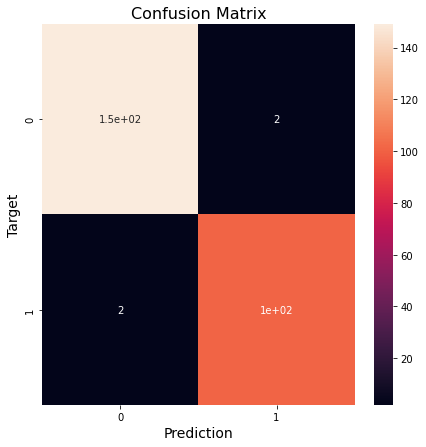

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize="14")
plt.ylabel('Target',fontsize="14")
plt.title('Confusion Matrix',fontsize="16");

In [ ]:
from sklearn.metrics import classification_report
print("Report on Predicted and Actual values of Train data:",end="\n\n")
print(classification_report(predictions_train, y_train_bin))
print("Report on Predicted and Actual values of Validation data:",end="\n\n")
print(classification_report(predictions_val, y_validation_bin))


Report on Predicted and Actual values of Train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       224

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508

Report on Predicted and Actual values of Validation data:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.98      0.98      0.98       103

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



In [ ]:
clf_bin.predict_proba(x_validation) 

array([[9.99957336e-01, 4.26635807e-05],
       [9.99999993e-01, 7.00724712e-09],
       [1.00000000e+00, 2.00172849e-18],
       [9.99775995e-01, 2.24005197e-04],
       [6.92936446e-03, 9.93070636e-01],
       [1.00000000e+00, 3.43815153e-17],
       [0.00000000e+00, 1.00000000e+00],
       [9.99997506e-01, 2.49386068e-06],
       [0.00000000e+00, 1.00000000e+00],
       [9.86376899e-01, 1.36231014e-02],
       [1.00000000e+00, 3.48885515e-14],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.24682499e-14],
       [9.99867757e-01, 1.32243427e-04],
       [4.78373341e-10, 1.00000000e+00],
       [9.99820677e-01, 1.79323334e-04],
       [9.99999967e-01, 3.29756538e-08],
       [1.00000000e+00, 3.45696562e-10],
       [1.00000000e+00, 7.73080416e-18],
       [1.83482118e-11, 1.00000000e+00],
       [1.00000000e+00, 9.23209930e-14],
       [6.75776390e-09, 9.99999993e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99634460e-01, 3.65539705e-04],
       [1.125766

### ***BUILDING MODEL FOR MULTI CLASSIFICATION WITH ACHIEVED OPTIMUM NO: OF NEURONS*** 

In [ ]:
clf_mul = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-5,max_iter=1000,
                      hidden_layer_sizes=(60,), random_state=50) # one hidden layer with 50  neurons                   
clf_mul.fit(x_train, y_train_mul)
predictions_train = clf_mul.predict(x_train)
predictions_val = clf_mul.predict(x_validation)
train_score = accuracy_score(predictions_train, y_train_mul)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val, y_validation_mul)
print("score on val data: ", val_score)
#print("R2 score on val data:",r2_score(predictions_val, y_validation_mul))
print("f1 score on val data:",f1_score(predictions_val, y_validation_mul,average='weighted'))

score on train data:  1.0
score on val data:  0.9881889763779528
f1 score on val data: 0.9882128286146271


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions_val, y_validation_mul)
cm

array([[75,  0,  2,  0],
       [ 0, 73,  0,  1],
       [ 0,  0, 57,  0],
       [ 0,  0,  0, 46]])

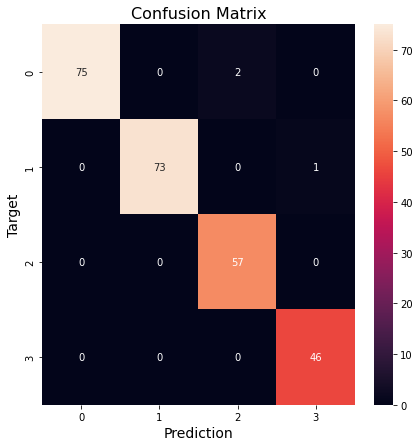

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize="14")
plt.ylabel('Target',fontsize="14")
plt.title('Confusion Matrix',fontsize="16");

In [ ]:
from sklearn.metrics import classification_report
print("Report on Predicted and Actual values of Train data:",end="\n\n")
print(classification_report(predictions_train, y_train_mul))
print("Report on Predicted and Actual values of Validation data:",end="\n\n")
print(classification_report(predictions_val, y_validation_mul))

Report on Predicted and Actual values of Train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00       121
           3       1.00      1.00      1.00        85

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508

Report on Predicted and Actual values of Validation data:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       1.00      0.99      0.99        74
           2       0.97      1.00      0.98        57
           3       0.98      1.00      0.99        46

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254



In [ ]:
clf_mul.predict_proba(x_validation)

array([[7.64577254e-154, 1.00000000e+000, 0.00000000e+000,
        1.10234046e-023],
       [5.17542398e-016, 0.00000000e+000, 1.00000000e+000,
        4.94701365e-291],
       [1.00000000e+000, 0.00000000e+000, 2.83563225e-083,
        2.38716766e-146],
       ...,
       [5.99941440e-239, 1.00000000e+000, 0.00000000e+000,
        1.22945899e-124],
       [9.36259172e-149, 1.00000000e+000, 0.00000000e+000,
        6.28867307e-046],
       [1.31543970e-144, 1.00000000e+000, 0.00000000e+000,
        2.83515233e-059]])

##**SVM (a few kernels, their hyper-parameters such as width, and slack penalty)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.metrics import r2_score

from sklearn.metrics import f1_score

The hyperparameters are type of kernels, width and slack penalty. 

###  ***BINARY CLASSIFICATION***

In [ ]:
# defining parameter range
hyp_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear',  'sigmoid']}
gridsearch_svm_bin = GridSearchCV(SVC(), hyp_param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
gridsearch_svm_bin.fit(x_train, y_train_bin);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.784 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.881 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.792 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.559 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.559 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.559 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.554 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.564 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.784 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

In [ ]:
# print best parameter after tuning
print("_______________________________________Best_Hyper_Parameters_______________________________________________________")
print()
print(gridsearch_svm_bin.best_params_)

_______________________________________Best_Hyper_Parameters_______________________________________________________

{'C': 10, 'gamma': 1, 'kernel': 'linear'}


###  ***MULTI CLASSIFICATION***

In [ ]:
# defining parameter range
hyp_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'sigmoid']}
gridsearch_svm_mul = GridSearchCV(SVC(), hyp_param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
gridsearch_svm_mul.fit(x_train, y_train_mul);


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.843 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.843 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.892 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.901 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.822 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.304 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.304 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.294 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.297 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.297 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.843 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

In [ ]:
# print best parameter after tuning
print("_______________________________________Best_Hyper_Parameters_______________________________________________________")
print(gridsearch_svm_mul.best_params_)


_______________________________________Best_Hyper_Parameters_______________________________________________________
{'C': 10, 'gamma': 1, 'kernel': 'linear'}


###OBSERVATIONS

Clearly both the binary and multi classification SVM models with hyperparameters `'C': 10, 'gamma': 1, 'kernel': 'linear'` are giving the best results.

### ***BUILDING SVM MODEL FOR BINARY CLASSIFICATION WITH ACHIEVED OPTIMUM HYPER-PARAMETERs*** 

In [ ]:
from sklearn import svm
svm_bin = svm.SVC(C=10, gamma=1,kernel='linear',random_state=50) #optimum model
svm_bin.fit(x_train,y_train_bin) 
predictions_train = svm_bin.predict(x_train)
predictions_val = svm_bin.predict(x_validation)
train_score = accuracy_score(predictions_train, y_train_bin)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val, y_validation_bin)
print("score on val data: ", val_score)
print("f1 score on val data:",f1_score(predictions_val, y_validation_bin,average='binary'))

score on train data:  0.9881889763779528
score on val data:  0.9763779527559056
f1 score on val data: 0.9711538461538461


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions_val, y_validation_bin)
cm

array([[147,   2],
       [  4, 101]])

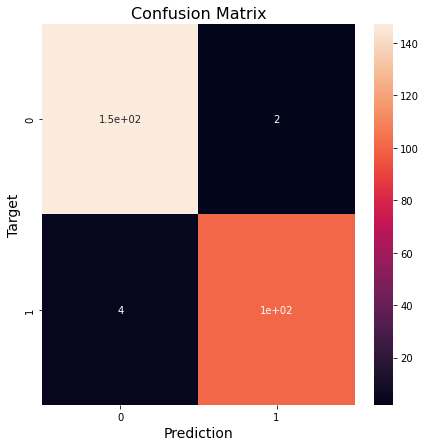

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize="14")
plt.ylabel('Target',fontsize="14")
plt.title('Confusion Matrix',fontsize="16");

In [ ]:
from sklearn.metrics import classification_report
print("Report on Predicted and Actual values of Train data:",end="\n\n")
print(classification_report(predictions_train, y_train_bin))
print("Report on Predicted and Actual values of Validation data:",end="\n\n")
print(classification_report(predictions_val, y_validation_bin))

Report on Predicted and Actual values of Train data:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       284
           1       0.99      0.99      0.99       224

    accuracy                           0.99       508
   macro avg       0.99      0.99      0.99       508
weighted avg       0.99      0.99      0.99       508

Report on Predicted and Actual values of Validation data:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.98      0.96      0.97       105

    accuracy                           0.98       254
   macro avg       0.98      0.97      0.98       254
weighted avg       0.98      0.98      0.98       254



### ***BUILDING SVM MODEL FOR MULTI CLASSIFICATION WITH ACHIEVED OPTIMUM HYPER-PARAMETER*** 

In [ ]:
from sklearn import svm
svm_mul = svm.SVC(C=10, gamma=1,kernel='linear',random_state=50)
svm_mul.fit(x_train,y_train_mul) 
predictions_train = svm_mul.predict(x_train)
predictions_val = svm_mul.predict(x_validation)
train_score = accuracy_score(predictions_train, y_train_mul)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val, y_validation_mul)
print("score on val data: ", val_score)
print("f1 score on val data:",f1_score(predictions_val, y_validation_mul,average='weighted'))

score on train data:  1.0
score on val data:  0.9921259842519685
f1 score on val data: 0.9921135702631765


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions_val, y_validation_mul)
cm

array([[73,  0,  0,  0],
       [ 0, 73,  0,  0],
       [ 2,  0, 59,  0],
       [ 0,  0,  0, 47]])

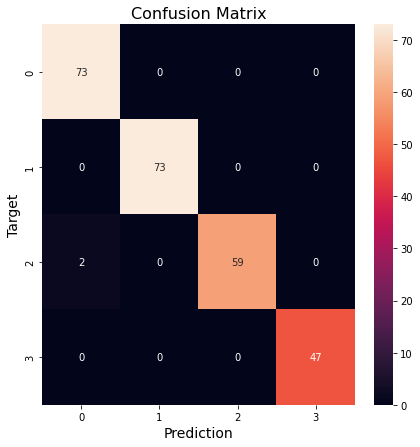

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize="14")
plt.ylabel('Target',fontsize="14")
plt.title('Confusion Matrix',fontsize="16");

In [ ]:
from sklearn.metrics import classification_report
print("Report on Predicted and Actual values of Train data:",end="\n\n")
print(classification_report(predictions_train, y_train_mul))
print("Report on Predicted and Actual values of Validation data:",end="\n\n")
print(classification_report(predictions_val, y_validation_mul))

Report on Predicted and Actual values of Train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00       121
           3       1.00      1.00      1.00        85

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508

Report on Predicted and Actual values of Validation data:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       1.00      1.00      1.00        73
           2       1.00      0.97      0.98        61
           3       1.00      1.00      1.00        47

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254



### ***FEATURE IMPORTANCE*** 

To get the feature importances from the Random Forest model use the feature_importances_ attribute:

In [ ]:
svm_bin.coef_.reshape(77,) # for binary classification model

array([ 1.42154481e+00,  7.21436312e+00, -7.41955968e-01, -3.04917816e+00,
        2.07292383e+00,  2.97471659e+00,  4.58804386e-02, -2.23708620e+00,
        2.16843082e+00,  4.62301948e-01, -5.13081950e-01, -1.24334626e-01,
        2.69286306e+00, -2.46210423e+00, -1.59340964e+00,  1.31187807e+00,
        1.10207316e+00, -6.34411707e-01, -1.47732471e+00,  1.54006725e+00,
       -2.08605719e+00, -1.12681796e+00, -1.67221489e+00, -2.79230019e+00,
       -7.02912826e+00, -2.17549709e+00,  1.45944130e+00, -6.87357394e-02,
        5.06797358e+00, -1.77004053e+00,  9.47917603e+00, -2.21549671e+00,
       -5.17572483e-01, -3.57177122e+00,  1.85444481e+00, -2.92471366e-03,
        3.47322714e+00, -4.02370300e+00, -1.75744733e+00, -3.29926014e+00,
       -1.67955003e+00,  4.23298273e+00,  1.33311969e+00,  2.29894262e+00,
        2.55174870e+00, -6.44313734e-02,  2.82614606e+00, -2.43078550e-02,
        5.99520300e-01,  7.23564378e-01,  1.10614751e+00, -9.95360488e-01,
        1.01318476e+00, -

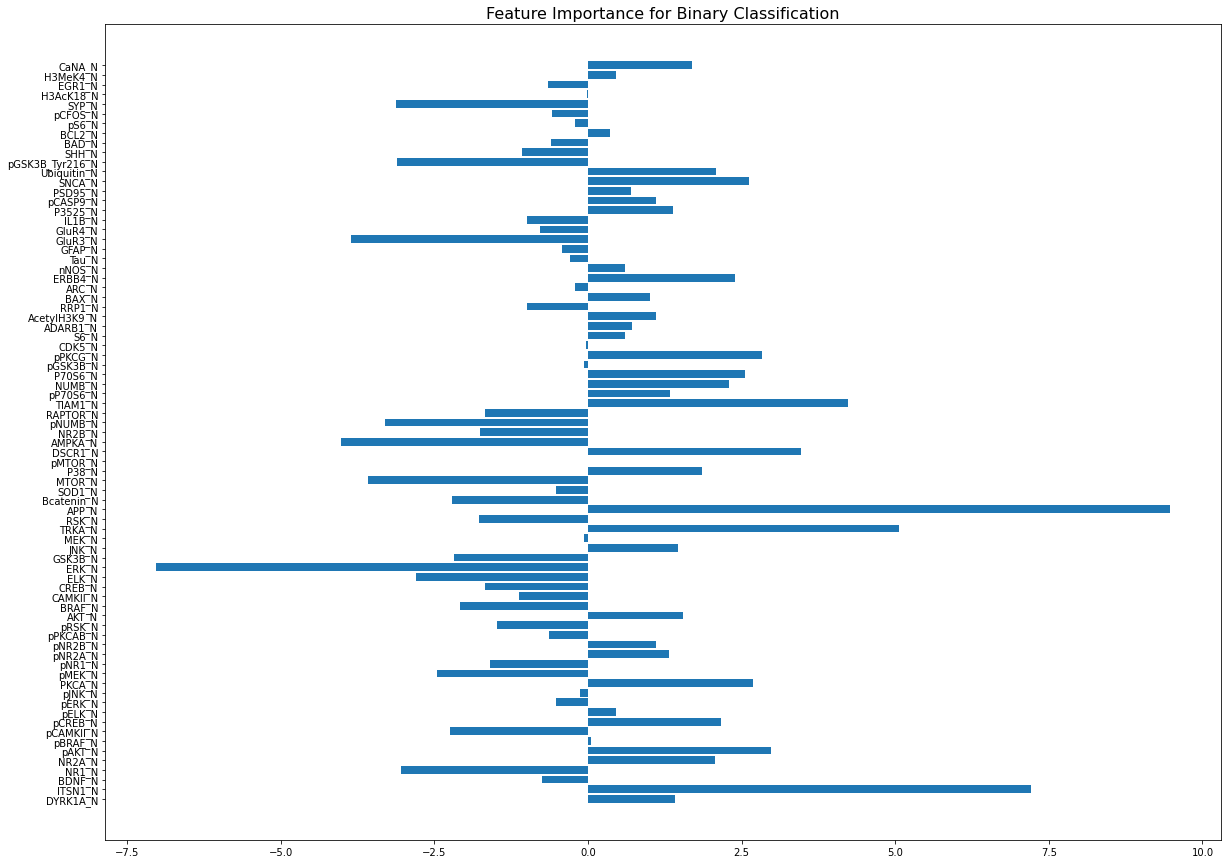

In [ ]:
# Let’s plot the importances (chart will be easier to interpret than values).
plt.figure(figsize=(20,15))
plt.barh(input_columns,svm_bin.coef_.reshape(77,) );
plt.title("Feature Importance for Binary Classification",fontsize="16");


Let's create dataframes having the importance of each feature for both the binary and multi classification models

In [ ]:
important_features_bin = pd.DataFrame({'Feature': input_columns, 'Importance':svm_bin.coef_.reshape(77,)}).sort_values('Importance', ascending=False)
important_features_bin # for binary classification model

,Feature,Importance
30,APP_N,9.479176
1,ITSN1_N,7.214363
28,TRKA_N,5.067974
41,TIAM1_N,4.232983
36,DSCR1_N,3.473227
...,...,...
39,pNUMB_N,-3.299260
33,MTOR_N,-3.571771
58,GluR3_N,-3.849073
37,AMPKA_N,-4.023703


Here we have sorted the dataframes based on importance in decreasing order i.e., the most important features will be at the top of the dataframe.

In [ ]:
important_features_bin.head(10) # checking the top 10 important features for binary classification model 

,Feature,Importance
30,APP_N,9.479176
1,ITSN1_N,7.214363
28,TRKA_N,5.067974
41,TIAM1_N,4.232983
36,DSCR1_N,3.473227
5,pAKT_N,2.974717
46,pPKCG_N,2.826146
12,PKCA_N,2.692863
64,SNCA_N,2.622930
44,P70S6_N,2.551749


Let's visualize these top 10 important features for both the models.

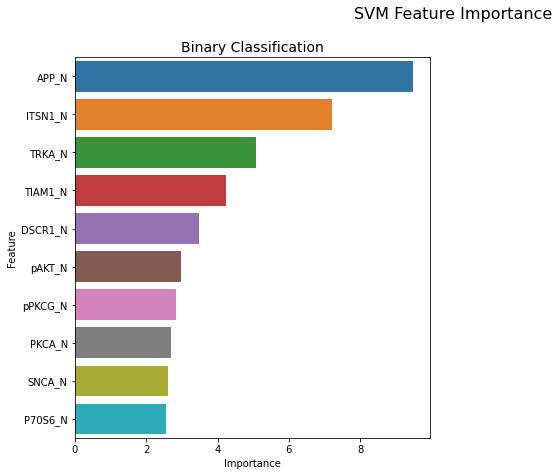

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Binary Classification',fontsize="14")
sns.barplot(data=important_features_bin.head(10), x='Importance', y='Feature');
plt.suptitle('SVM Feature Importance',fontsize="16");

The top important features obtained using SVM model are:


**'APP_N', 'ITSN1_N', 'TRKA_N', 'TIAM1_N', 'DSCR1_N'**

##**Random forest (number of trees, max tree depth, max number of variables per node)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

###  ***BINARY CLASSIFICATION***

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
hyp_param_grid = {'max_depth': [10,50,100],
              'n_estimators': [100,200,300],
              'random_state':[50]}
gridsearch_rf_bin = GridSearchCV(RandomForestClassifier(), hyp_param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
gridsearch_rf_bin.fit(x_train, y_train_bin);

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.980 total time=   0.3s
[CV 2/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.980 total time=   0.3s
[CV 3/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.971 total time=   0.3s
[CV 4/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.990 total time=   0.3s
[CV 5/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.960 total time=   0.3s
[CV 1/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.990 total time=   0.6s
[CV 2/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.990 total time=   0.5s
[CV 3/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.961 total time=   0.5s
[CV 4/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.990 total time=   0.5s
[CV 5/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.960 total time=   0.5s


In [ ]:
# print best parameter after tuning
print("_______________________________________Best_Hyper_Parameters_______________________________________________________")
print()
print(gridsearch_rf_bin .best_params_)

_______________________________________Best_Hyper_Parameters_______________________________________________________

{'max_depth': 50, 'n_estimators': 100, 'random_state': 50}


In [ ]:
grid_predictions = gridsearch_rf_bin .predict(x_validation)
print("_______________________________________classification report________________________________________________________")  
# print classification report
print(classification_report(y_validation_bin, grid_predictions))

_______________________________________classification report________________________________________________________
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       151
           1       0.97      0.95      0.96       103

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



###  ***MULTI CLASSIFICATION***

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
hyp_param_grid = {'max_depth': [10,50,100],
              'n_estimators': [100,200,300],
              'random_state':[50]}
gridsearch_rf_mul = GridSearchCV(RandomForestClassifier(), hyp_param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
gridsearch_rf_mul.fit(x_train, y_train_mul);

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.951 total time=   0.3s
[CV 2/5] END max_depth=10, n_estimators=100, random_state=50;, score=1.000 total time=   0.3s
[CV 3/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.980 total time=   0.3s
[CV 4/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.970 total time=   0.3s
[CV 5/5] END max_depth=10, n_estimators=100, random_state=50;, score=0.980 total time=   0.3s
[CV 1/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.951 total time=   0.5s
[CV 2/5] END max_depth=10, n_estimators=200, random_state=50;, score=1.000 total time=   0.5s
[CV 3/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.980 total time=   0.6s
[CV 4/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.960 total time=   0.5s
[CV 5/5] END max_depth=10, n_estimators=200, random_state=50;, score=0.980 total time=   0.5s


In [ ]:
# print best parameter after tuning
print("_______________________________________Best_Hyper_Parameters_______________________________________________________")
print()
print(gridsearch_rf_mul .best_params_)

_______________________________________Best_Hyper_Parameters_______________________________________________________

{'max_depth': 10, 'n_estimators': 100, 'random_state': 50}


In [ ]:
grid_predictions = gridsearch_rf_mul .predict(x_validation)
print("_______________________________________classification report________________________________________________________")  
# print classification report
print(classification_report(y_validation_mul, grid_predictions))

_______________________________________classification report________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        73
           2       0.98      1.00      0.99        59
           3       1.00      0.96      0.98        47

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254



### OBSERVATIONS

In [ ]:
# observing and finalizing the best model
print("For Best max_depth of {0} and max no: of trees {1} achieved in binary classification ".format(50,100))
print("Binary Classification model:  Val accuracy: {0}".format(0.97))
print("Multi Classification model:   Val accuracy: {0} ".format(0.98))
print()
print("For Best max_depth of {0} and max no: of trees {1} achieved in multi classification".format(10,100))
print("Binary Classification model:  Val accuracy: {0}".format(0.98))
print("Multi Classification model:   Val accuracy: {0}".format(0.99))

For Best max_depth of 50 and max no: of trees 100 achieved in binary classification 
Binary Classification model:  Val accuracy: 0.97
Multi Classification model:   Val accuracy: 0.98 

For Best max_depth of 10 and max no: of trees 100 achieved in multi classification
Binary Classification model:  Val accuracy: 0.98
Multi Classification model:   Val accuracy: 0.99


Clearly max_depth of 10 and max no: of trees 100 is good for both binary and multiclass classification.

### ***BUILDING MODEL FOR BINARY CLASSIFICATION WITH ACHIEVED OPTIMUM HYPERPARAMETERS*** 

In [ ]:
rfc_bin = RandomForestClassifier(max_depth = 10, n_estimators = 100,random_state=50) #optimum model
rfc_bin.fit(x_train, y_train_bin)
predictions_train = rfc_bin.predict(x_train)
predictions_val = rfc_bin.predict(x_validation)
train_score = accuracy_score(predictions_train, y_train_bin)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val, y_validation_bin)
print("score on val data: ", val_score)
print("f1 score on val data:",f1_score(predictions_val, y_validation_bin,average='binary'))


score on train data:  1.0
score on val data:  0.9645669291338582
f1 score on val data: 0.9560975609756097


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions_val, y_validation_bin)
cm

array([[147,   5],
       [  4,  98]])

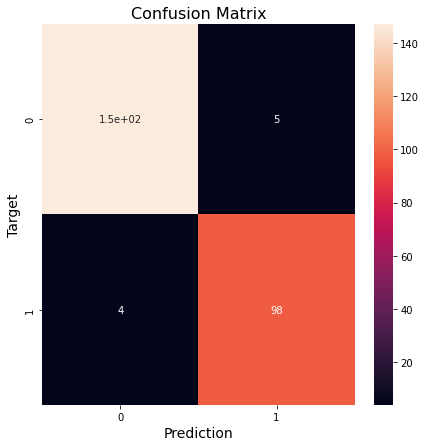

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize="14")
plt.ylabel('Target',fontsize="14")
plt.title('Confusion Matrix',fontsize="16");

In [ ]:
from sklearn.metrics import classification_report
print("Report on Predicted and Actual values of Train data:",end="\n\n")
print(classification_report(predictions_train, y_train_bin))
print("Report on Predicted and Actual values of Validation data:",end="\n\n")
print(classification_report(predictions_val, y_validation_bin))

Report on Predicted and Actual values of Train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       224

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508

Report on Predicted and Actual values of Validation data:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       152
           1       0.95      0.96      0.96       102

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



### ***BUILDING MODEL FOR MULTI CLASSIFICATION WITH ACHIEVED OPTIMUM HYPERPARAMETERS*** 

In [ ]:
rfc_mul = RandomForestClassifier(max_depth = 10, n_estimators = 100,random_state=42) #optimum model
rfc_mul.fit(x_train, y_train_mul)
predictions_train = rfc_mul.predict(x_train)
predictions_val = rfc_mul.predict(x_validation)
train_score = accuracy_score(predictions_train, y_train_mul)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val, y_validation_mul)
print("score on val data: ", val_score)
print("f1 score on val data:",f1_score(predictions_val, y_validation_mul,average='weighted'))

score on train data:  1.0
score on val data:  0.9803149606299213
f1 score on val data: 0.980378330921321


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions_val, y_validation_mul)
cm

array([[73,  0,  0,  0],
       [ 0, 73,  0,  3],
       [ 2,  0, 59,  0],
       [ 0,  0,  0, 44]])

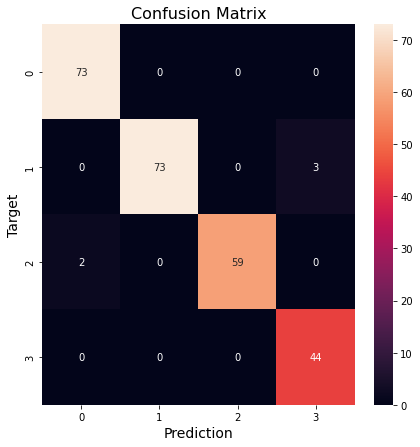

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize="14")
plt.ylabel('Target',fontsize="14")
plt.title('Confusion Matrix',fontsize="16");

In [ ]:
from sklearn.metrics import classification_report
print("Report on Predicted and Actual values of Train data:",end="\n\n")
print(classification_report(predictions_train, y_train_mul))
print("Report on Predicvted and Actual values of Validation data:",end="\n\n")
print(classification_report(predictions_val, y_validation_mul))

Report on Predicted and Actual values of Train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00       121
           3       1.00      1.00      1.00        85

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508

Report on Predicvted and Actual values of Validation data:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       1.00      0.96      0.98        76
           2       1.00      0.97      0.98        61
           3       0.94      1.00      0.97        44

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



### ***FEATURE IMPORTANCE*** 

To get the feature importances from the Random Forest model use the feature_importances_ attribute:

In [ ]:
rfc_bin.feature_importances_ # for binary classification model

array([0.01793283, 0.06273975, 0.01089611, 0.00588073, 0.00897161,
       0.01167237, 0.00495553, 0.00980231, 0.01468136, 0.00869701,
       0.01052115, 0.00864466, 0.00773388, 0.00605694, 0.00783849,
       0.00573331, 0.00566049, 0.01054969, 0.01039796, 0.01088602,
       0.01546543, 0.00807397, 0.00644161, 0.00764725, 0.01275243,
       0.00590361, 0.00749742, 0.00655737, 0.00818212, 0.00515893,
       0.09591032, 0.00441336, 0.00805179, 0.02165863, 0.01511321,
       0.02166645, 0.01158691, 0.02045827, 0.01048349, 0.01244191,
       0.01003774, 0.00919625, 0.01300728, 0.00891614, 0.00316711,
       0.00781812, 0.03597283, 0.00541975, 0.01917382, 0.01113664,
       0.04063114, 0.0086907 , 0.00533202, 0.01089769, 0.00810572,
       0.00642998, 0.02741792, 0.00638953, 0.03321467, 0.01008423,
       0.01339733, 0.00766824, 0.01120932, 0.00868574, 0.00496583,
       0.01244001, 0.00929913, 0.00635687, 0.00610633, 0.01471427,
       0.01114965, 0.00966815, 0.01669963, 0.01547774, 0.01049

In [ ]:
rfc_mul.feature_importances_ # for multi classification model

array([0.0238851 , 0.00767942, 0.00490118, 0.00363114, 0.00229882,
       0.01552308, 0.00842767, 0.03452809, 0.00467197, 0.00948025,
       0.04834621, 0.01288061, 0.00966593, 0.00942094, 0.00244954,
       0.01043898, 0.0034429 , 0.03033386, 0.00620148, 0.00790963,
       0.02470235, 0.00464395, 0.00565484, 0.0078147 , 0.00658584,
       0.01306459, 0.00562805, 0.00586174, 0.0041325 , 0.00528371,
       0.00604149, 0.00372346, 0.0947033 , 0.00485814, 0.02994541,
       0.01672291, 0.01445451, 0.00571944, 0.00547032, 0.03068611,
       0.00808323, 0.00936551, 0.01570126, 0.0122047 , 0.00488008,
       0.02163683, 0.02596996, 0.01070548, 0.01533022, 0.00486412,
       0.00712951, 0.00880912, 0.01096042, 0.02066649, 0.00454987,
       0.01429878, 0.01221124, 0.00969794, 0.0110381 , 0.00706827,
       0.0126692 , 0.01006524, 0.00634182, 0.00852639, 0.01732991,
       0.04384712, 0.00746942, 0.00526519, 0.00342716, 0.00196037,
       0.01286978, 0.00342341, 0.00609598, 0.00972122, 0.00610

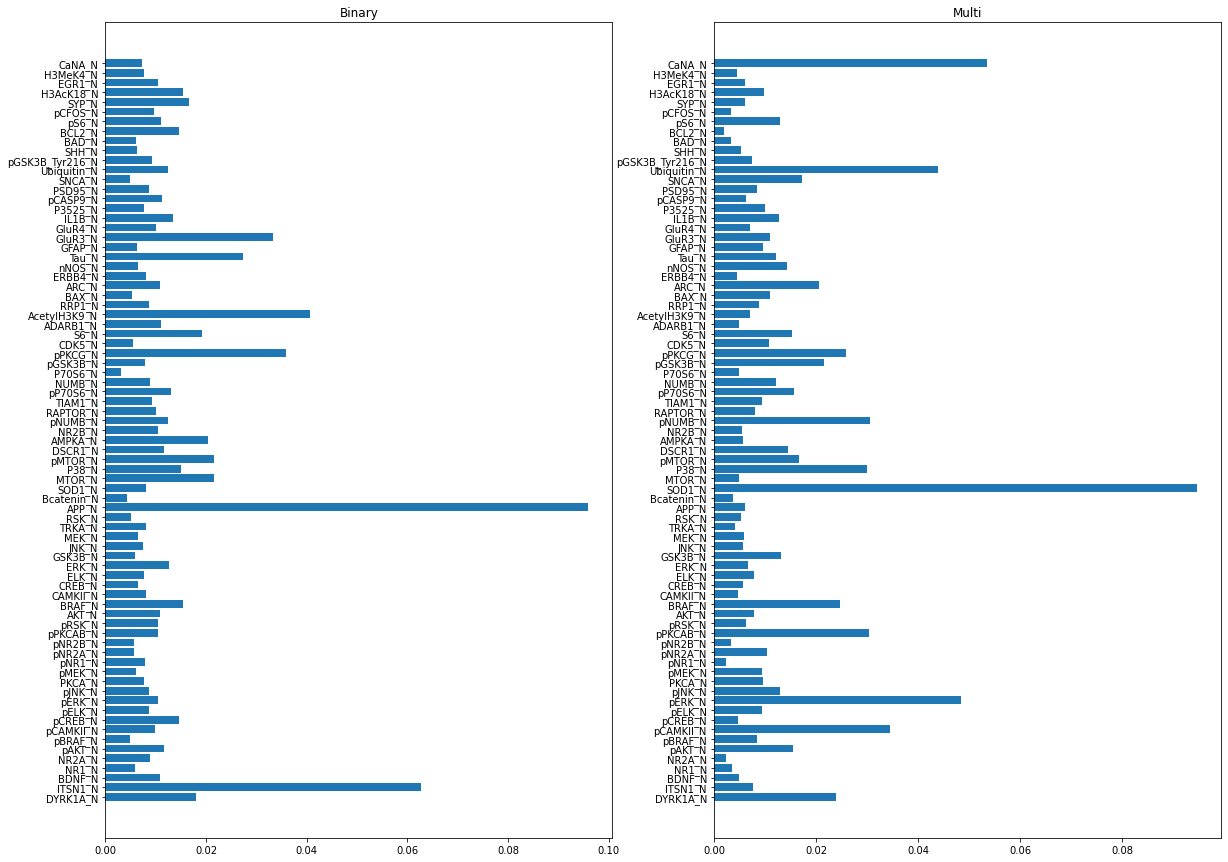

In [ ]:
# Let’s plot the importances (chart will be easier to interpret than values).
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.barh(input_columns, rfc_bin.feature_importances_);
plt.title("Binary");
plt.subplot(122)
plt.barh(input_columns, rfc_mul.feature_importances_);
plt.title("Multi");

Let's create dataframes having the importance of each feature for both the binary and multi classification models

In [ ]:
important_features_bin = pd.DataFrame({'Feature': input_columns, 'Importance':rfc_bin.feature_importances_}).sort_values('Importance', ascending=False)
important_features_bin # for binary classification model

,Feature,Importance
30,APP_N,0.095910
1,ITSN1_N,0.062740
50,AcetylH3K9_N,0.040631
46,pPKCG_N,0.035973
58,GluR3_N,0.033215
...,...,...
29,RSK_N,0.005159
64,SNCA_N,0.004966
6,pBRAF_N,0.004956
31,Bcatenin_N,0.004413


In [ ]:
important_features_mul = pd.DataFrame({'Feature': input_columns, 'Importance': rfc_mul.feature_importances_}).sort_values('Importance', ascending=False)
important_features_mul # for multi classification model 

,Feature,Importance
32,SOD1_N,0.094703
76,CaNA_N,0.053450
10,pERK_N,0.048346
65,Ubiquitin_N,0.043847
7,pCAMKII_N,0.034528
...,...,...
68,BAD_N,0.003427
71,pCFOS_N,0.003423
14,pNR1_N,0.002450
4,NR2A_N,0.002299


Here we have sorted the dataframes based on importance in decreasing order i.e., the most important features will be at the top of the dataframe.

In [ ]:
important_features_bin.head(10) # checking the top 10 important features for binary classification model 

,Feature,Importance
30,APP_N,0.095910
1,ITSN1_N,0.062740
50,AcetylH3K9_N,0.040631
46,pPKCG_N,0.035973
58,GluR3_N,0.033215
56,Tau_N,0.027418
35,pMTOR_N,0.021666
33,MTOR_N,0.021659
37,AMPKA_N,0.020458
48,S6_N,0.019174


In [ ]:
important_features_mul.head(10) # checking the top 10 important features for multi classification model 

,Feature,Importance
32,SOD1_N,0.094703
76,CaNA_N,0.053450
10,pERK_N,0.048346
65,Ubiquitin_N,0.043847
7,pCAMKII_N,0.034528
39,pNUMB_N,0.030686
17,pPKCAB_N,0.030334
34,P38_N,0.029945
46,pPKCG_N,0.025970
20,BRAF_N,0.024702


Let's visualize these top 10 important features for both the models.

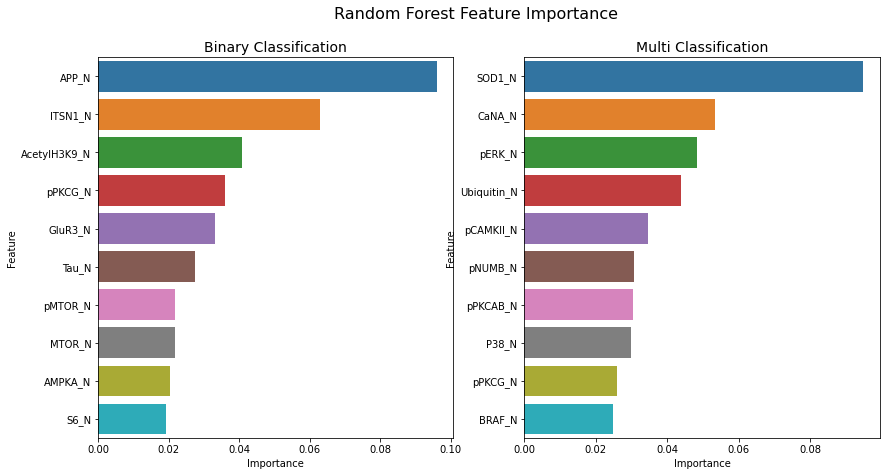

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Binary Classification',fontsize="14")
sns.barplot(data=important_features_bin.head(10), x='Importance', y='Feature');
plt.subplot(122)
plt.title('Multi Classification',fontsize="14")
sns.barplot(data=important_features_mul.head(10), x='Importance', y='Feature');
plt.suptitle('Random Forest Feature Importance',fontsize="16");

In [ ]:
# printing the most common features from top 20 important features from both the models
common_member(list(important_features_bin['Feature'].values[:20]), list(important_features_mul['Feature'].values[:20]))

{'S6_N', 'pPKCG_N', 'DYRK1A_N', 'P38_N', 'pMTOR_N', 'pP70S6_N', 'BRAF_N'}


The top important features obtained using Elasticnet model for both binary and multi classifications are:<br>**'S6_N', 'Ubiquitin_N', 'pNUMB_N', 'pPKCG_N', 'P38_N', 'pPKCAB_N', 'BRAF_N', 'pMTOR_N'**

##  OBSERVATIONS

In [ ]:
# observing and finalizing the best model
print("Binary Classification model")
print("ElasticNet Model - Val accuracy: {0}".format(round(val_scores_bin[best_l1_ratio_index_bin],3)))
print("NN -  Val accuracy: {0}".format(round(val_scores_bin[best_neurons_index_bin],3)))
print("SVM - Val accuracy: {0}".format( 0.98))
print("Random forest- Val accuracy: {0}".format(0.976))
print()
print("Multi Classification model")
print("ElasticNet Model - Val accuracy: {0}".format(round(val_scores_mul[best_l1_ratio_index_bin],3)))
print("NN -  Val accuracy: {0}".format(round(val_scores_mul[best_neurons_index_mul],3)))
print("SVM - Val accuracy: {0}".format( 0.99))
print("Random forest- Val accuracy: {0}".format(0.980))


Binary Classification model
ElasticNet Model - Val accuracy: 0.972
NN -  Val accuracy: 0.984
SVM - Val accuracy: 0.98
Random forest- Val accuracy: 0.976

Multi Classification model
ElasticNet Model - Val accuracy: 0.984
NN -  Val accuracy: 0.996
SVM - Val accuracy: 0.99
Random forest- Val accuracy: 0.98


Clearly on comparing the 4 models, the observations are as follows:
- NN classifier is the best model we obtained giving an accuracy of $98\%-99\%$.
- The second best model we obtained is Random forest classifier producing $97\%-98\%$ accuracy.

Feature Importance:
The most important features obtained with reference to all the 4 models are:

**'APP_N','TRKA_N','S6_N'**


## 7.FEATURE ELIMINATION

The features removed are DYRK1A_N,pS6_N, NR1_N. So we will remove them and train our best models and see the impact on accuracy.

In [ ]:
training_inputs.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')

In [ ]:
training_inputs1=training_inputs.drop(labels=['DYRK1A_N','pS6_N', 'NR1_N'],axis=1)
training_inputs1

,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
626,0.127301,0.325871,0.263088,0.608864,0.581878,0.579858,0.625279,0.179983,0.063842,0.734587,...,0.421511,0.238949,0.334573,0.363276,0.230781,0.334653,0.397923,0.265238,0.504835,0.392729
239,0.094465,0.376008,0.221987,0.485471,0.504949,0.174743,0.388053,0.146092,0.058723,0.588009,...,0.516330,0.279521,0.644731,0.438947,0.506059,0.441283,0.359707,0.502365,0.551003,0.762430
689,0.110128,0.315757,0.084485,0.417493,0.414849,0.344792,0.447150,0.130500,0.096172,0.577959,...,0.489104,0.492324,0.587996,0.398401,0.454077,0.359977,0.328729,0.358953,0.450565,0.683675
176,0.068973,0.211207,0.178707,0.375419,0.442639,0.613986,0.302643,0.124061,0.040988,0.584561,...,0.379762,0.224668,0.585708,0.654716,0.695979,0.436550,0.302282,0.591671,0.473385,0.339161
521,0.137180,0.563839,0.332080,0.485628,0.515397,0.402770,0.470860,0.127060,0.110472,0.641314,...,0.563430,0.391834,0.442975,0.267068,0.396994,0.366954,0.157506,0.258081,0.257175,0.855306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.127894,0.212110,0.261346,0.406150,0.445481,0.321878,0.282361,0.138740,0.111134,0.562819,...,0.574091,0.411130,0.410960,0.222856,0.459390,0.225550,0.096313,0.256838,0.230413,0.530838
106,0.341950,0.837178,0.475644,0.432301,0.534499,0.467859,0.832236,0.240753,0.295152,0.666637,...,0.552252,0.407468,0.176412,0.121859,0.122603,0.426491,0.102772,0.123250,0.109956,0.559264
270,0.348517,1.000000,1.000000,0.461185,0.559354,0.270276,0.780186,0.418149,0.307756,0.779843,...,0.171479,0.156358,0.217579,0.381031,0.415728,0.450939,0.069874,0.182336,0.179303,0.503579
435,0.317389,0.563673,0.360799,0.375112,0.395269,0.152889,0.609839,0.293847,0.255010,0.456767,...,0.497770,0.231106,0.090636,0.500000,0.500000,0.282362,0.082225,0.006105,0.070333,0.805257


In [ ]:
validation_inputs1 = validation_inputs.drop(labels=['DYRK1A_N','pS6_N', 'NR1_N'],axis=1)
validation_inputs1

,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
196,0.142709,0.348312,0.286562,0.362174,0.379576,0.561765,0.391584,0.150723,0.050847,0.542588,...,0.466724,0.490687,0.179325,0.225209,0.358649,0.268099,0.093006,0.244401,0.170689,0.262221
260,0.773152,0.581438,0.481629,0.385684,0.445215,0.305841,0.542627,0.626350,0.632595,0.521028,...,0.907175,0.203289,0.187966,0.164294,0.187504,0.420859,0.200984,0.177042,0.267478,0.934309
39,0.136706,0.430408,0.377673,0.504091,0.554732,0.223886,0.482785,0.160826,0.123186,0.619933,...,0.654002,0.439591,0.500000,0.444071,0.500000,0.482480,0.181038,0.390090,0.434648,0.747345
449,0.192759,0.279704,0.222277,0.370446,0.403189,0.094241,0.483788,0.187634,0.139877,0.462385,...,0.504765,0.234196,0.211086,0.500000,0.500000,0.197233,0.151288,0.177848,0.209861,0.653735
595,0.106356,0.628986,0.370679,0.790050,0.705826,0.442036,0.733780,0.208732,0.042538,0.824871,...,0.193394,0.229953,0.500000,0.382766,0.283567,0.405996,0.281128,0.476921,0.438069,0.196666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.121529,0.242660,0.215464,0.345173,0.357749,0.165348,0.289952,0.107847,0.067947,0.465634,...,0.546536,0.185638,0.336436,0.217611,0.263399,0.278059,0.138761,0.198812,0.128329,0.710903
296,0.082723,0.197688,0.205546,0.315349,0.305029,0.147405,0.281533,0.079013,0.082578,0.481957,...,0.599847,0.252818,0.368709,0.289689,0.310329,0.499604,0.153507,0.303968,0.278295,0.843036
607,0.110497,0.326185,0.379448,0.550045,0.546143,0.808207,0.540464,0.148104,0.034206,0.700081,...,0.395575,0.333202,0.352739,0.386474,0.339525,0.321224,0.151231,0.336733,0.336236,0.341924
630,0.158408,0.427757,0.523132,0.460375,0.431997,0.691003,0.581173,0.158136,0.053280,0.613137,...,0.638848,0.362297,0.500000,0.500000,0.272891,0.342265,0.330017,0.463330,0.207259,0.300107


In [ ]:
x_train1 = np.array(training_inputs1[training_inputs1.columns[:-2]]) # training and val inputs and targets
x_validation1 = np.array(validation_inputs1[validation_inputs1.columns[:-2]])


### SVM CLASSIFIER 

In [ ]:
from sklearn import svm
print("__________Binary classification____________")
svm_bin1 = svm.SVC(C=10, gamma=1,kernel='linear',random_state=50) #optimum model
svm_bin1.fit(x_train1,y_train_bin) 
predictions_train1 = svm_bin1.predict(x_train1)
predictions_val1 = svm_bin1.predict(x_validation1)
train_score = accuracy_score(predictions_train1, y_train_bin)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val1, y_validation_bin)
print("score on val data: ", val_score)
print("f1 score on val data:",f1_score(predictions_val1, y_validation_bin,average='binary'))
print()
print("__________Multi classification____________")
svm_mul1 = svm.SVC(C=10, gamma=1,kernel='linear',random_state=50) #optimum model
svm_mul1.fit(x_train1,y_train_mul) 
predictions_train1 = svm_mul1.predict(x_train1)
predictions_val1 = svm_mul1.predict(x_validation1)
train_score = accuracy_score(predictions_train1, y_train_mul)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val1, y_validation_mul)
print("score on val data: ", val_score)
print("f1 score on val data:",f1_score(predictions_val1, y_validation_mul,average='weighted'))

__________Binary classification____________
score on train data:  0.9881889763779528
score on val data:  0.9763779527559056
f1 score on val data: 0.9711538461538461

__________Multi classification____________
score on train data:  1.0
score on val data:  0.9960629921259843
f1 score on val data: 0.9960596615119122


Using the SVM Classifier for **binary classification** without feature elimination produced the following results:

- score on train data:  1.0
- score on val data:  0.9763779527559056
- f1 score on val data: 0.970873786407767

And with feature elimination produced:

- score on train data:  0.9881889763779528
- score on val data:  0.9763779527559056
- f1 score on val data: 0.9711538461538461

Similarly for **multi classification** without feature elimination produced the following results:

- score on train data:  1.0
- score on val data:  0.9921259842519685
- f1 score on val data: 0.9921135702631765

And with feature elimination produced:

- score on train data: 1.0
- score on val data:  0.9960629921259843
- f1 score on val data: 0.9960596615119122

Clearly almost all the results are nearly same.


### RANDOM FOREST CLASSIFIER

In [ ]:
print("__________Binary classification____________")
rfc_bin1 = RandomForestClassifier(max_depth = 10, n_estimators = 100,random_state=50) #optimum model
rfc_bin1.fit(x_train1, y_train_bin)
predictions_train1 = rfc_bin1.predict(x_train1)
predictions_val1 = rfc_bin1.predict(x_validation1)
train_score = accuracy_score(predictions_train1, y_train_bin)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val1, y_validation_bin)
print("score on val data: ", val_score)
print("f1 score on val data:",f1_score(predictions_val1, y_validation_bin,average='binary'))
print()
print("__________Multi classification____________")
rfc_mul1 = RandomForestClassifier(max_depth = 10, n_estimators = 100,random_state=42) #optimum model
rfc_mul1.fit(x_train1, y_train_mul)
predictions_train1 = rfc_mul1.predict(x_train1)
predictions_val1 = rfc_mul1.predict(x_validation1)
train_score = accuracy_score(predictions_train1, y_train_mul)
print("score on train data: ", train_score)
val_score = accuracy_score(predictions_val1, y_validation_mul)
print("score on val data: ", val_score)
print("f1 score on val data:",f1_score(predictions_val1, y_validation_mul,average='weighted'))

__________Binary classification____________
score on train data:  1.0
score on val data:  0.9763779527559056
f1 score on val data: 0.970873786407767

__________Multi classification____________
score on train data:  1.0
score on val data:  0.984251968503937
f1 score on val data: 0.9843244221700566


Using the Random Forest Classifier for **binary classification** without feature elimination produced the following results:

- score on train data:  1.0
- score on val data:  0.9763779527559056
- f1 score on val data: 0.970873786407767

And with feature elimination produced:

- score on train data:  1.0
- score on val data:  0.9724409448818898
- f1 score on val data: 0.966183574879227


Similarly for **multi classification** without feature elimination produced the following results:

- score on train data:  1.0
- score on val data:  0.9803149606299213
- f1 score on val data: 0.9803214479495063

And with feature elimination produced:

- score on train data:  1.0
- score on val data:  0.9803149606299213
- f1 score on val data: 0.980378330921321

Clearly almost all the results are nearly same.


## 8.TESTING

In [ ]:
test_df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")
test_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [ ]:
#Multivariate Imputation
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data1= test_df.select_dtypes(include=numerics)
lr=SVR()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=10,tol=1e-10,imputation_order='roman')
data1=pd.DataFrame(imp.fit_transform(data1))
i=0;
for col in test_df.columns:
 if i<76:
  test_df[col]=data1[i];
 i=i+1;

[IterativeImputer] Completing matrix with shape (225, 77)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.12
[IterativeImputer] Change: 0.13688724285633813, scaled tolerance: 6.368256743e-10 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.23
[IterativeImputer] Change: 0.0001307556226462503, scaled tolerance: 6.368256743e-10 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.35
[IterativeImputer] Change: 3.078795829392078e-10, scaled tolerance: 6.368256743e-10 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
test_df.isna().sum()

DYRK1A_N              0
ITSN1_N               0
BDNF_N                0
NR1_N                 0
NR2A_N                0
                     ..
EGR1_N                0
H3MeK4_N              0
CaNA_N                0
Genotype              0
Treatment_Behavior    0
Length: 79, dtype: int64

In [ ]:
# label encoding of 'Genotype' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = test_df
df1['Genotype']= le.fit_transform(test_df['Genotype'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df1

{'Control': 0, 'Ts65Dn': 1}


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.214978,1.649983,0,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.214818,1.638988,0,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.214868,1.564925,0,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.215106,1.682222,0,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.214739,1.660352,0,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,1,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,1,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,1,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,1,Saline_S/C


In [ ]:
# label encoding of 'Treatment_Behavior' column
df1['Treatment_Behavior']= le.fit_transform(df1['Treatment_Behavior'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df1

{'Memantine_C/S': 0, 'Memantine_S/C': 1, 'Saline_C/S': 2, 'Saline_S/C': 3}


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.214978,1.649983,0,0
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.214818,1.638988,0,0
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.214868,1.564925,0,0
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.215106,1.682222,0,0
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.214739,1.660352,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,1,3
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,1,3
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,1,3
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,1,3


In [ ]:
input_columns = list(df1.columns)[0:-2] # all columns except the last 2 are features
target_column_bin = 'Genotype' # target column for binary classification
target_column_mul = 'Treatment_Behavior'  # target column for multi classification

In [ ]:
testing_inputs = df1[input_columns].copy()           # training features
testing_targets_bin = df1[target_column_bin].copy()  # training targets for binary
testing_targets_mul = df1[target_column_mul].copy()  # training targets for multi

In [ ]:
testing_inputs[input_columns] = scaler.transform(testing_inputs[input_columns]) # scaling the features of train, val datasets

In [ ]:
x_test = np.array(testing_inputs[input_columns])
y_test_bin = np.array(testing_targets_bin)
y_test_mul = np.array(testing_targets_mul)


In [ ]:
x_test.shape

(225, 77)

### Testing using Random Forest classifier - Binary Classification

In [ ]:
predictions_test = rfc_bin.predict(x_test) # predicting
predictions_test 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
accuracy_score(predictions_test, y_test_bin) # gives the accuracy on test data

0.7466666666666667

### Testing using SVM classifier - Binary Classification

In [ ]:
predictions_test = svm_bin.predict(x_test)# predicting
predictions_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

In [ ]:
accuracy_score(predictions_test, y_test_bin) # gives the accuracy on test data

0.7555555555555555

### Testing using Random Forest classifier - Multi Classification

In [ ]:
predictions_test = rfc_mul.predict(x_test) # predicting
predictions_test 

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [ ]:
accuracy_score(predictions_test, y_test_mul) # gives the accuracy on test data

0.6977777777777778

### Testing using SVM classifier - Multi Classification

In [ ]:
predictions_test = svm_mul.predict(x_test)# predicting
predictions_test

array([2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [ ]:
accuracy_score(predictions_test, y_test_mul) # gives the accuracy on test data

0.8933333333333333

## 9.Observations
- SVM classifier was our best model achieved and clearly gave an accuracy of $75\%$ for binary and $90\%$ for multi classification.
- Random Forest classifier was our second best model and gave an accuracy of $73\%$ for binary and $70\%$ for multi classification.

Clearly both the models are giving an accuracy $> 70\%$ . So both these models are good and best models achieved.

## 10.REFERENCES

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c

https://scikit-learn.org/stable/modules/impute.html

Didn't discuss with any other group members.